# 1. Importação

In [1]:
import pandas as pd
import os

In [2]:
diretorio: str = r'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
diretorio_df: str = fr'{diretorio}\\DATAFRAMES'
arquivo: str = 'DF_CAU_03.parquet'
df_embeddings: str = pd.read_parquet(os.path.join(diretorio_df, arquivo), engine='pyarrow')
df_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       669 non-null    float64
 1   1       669 non-null    float64
 2   2       669 non-null    float64
 3   3       669 non-null    float64
 4   4       669 non-null    float64
 5   5       669 non-null    float64
 6   6       669 non-null    float64
 7   7       669 non-null    float64
 8   8       669 non-null    float64
 9   9       669 non-null    float64
 10  10      669 non-null    float64
 11  11      669 non-null    float64
 12  12      669 non-null    float64
 13  13      669 non-null    float64
 14  14      669 non-null    float64
 15  15      669 non-null    float64
 16  16      669 non-null    float64
 17  17      669 non-null    float64
 18  18      669 non-null    float64
 19  19      669 non-null    float64
 20  20      669 non-null    float64
 21  21      669 non-null    float64
 22  22

In [3]:
embeddings = df_embeddings.values

In [20]:
import statsmodels.api as sm

arquivo: str = 'DF_CAU_02.parquet'
df_2_eda: str = pd.read_parquet(os.path.join(diretorio_df, arquivo), engine='pyarrow')

array_eda = df_2_eda['RENDA_M_FAMILIAR'].values
array_embeddings = df_embeddings.values

data = df_2_eda
y = array_eda
X = array_embeddings

X = sm.add_constant(X)

modelo = sm.OLS(y, X)
resultado = modelo.fit()

print(resultado.summary())

# Extraindo os coeficientes e seus intervalos de confiança
coeficientes = resultado.params
intervalos_confianca = resultado.conf_int()

print("\nCoeficientes:")
print(coeficientes)
print("\nIntervalos de confiança:")
print(intervalos_confianca)

# Calculando as probabilidades preditas para cada categoria da variável dependente
probabilidades_preditas = resultado.predict(X)

print("\nProbabilidades preditas:")
print(probabilidades_preditas)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     26.73
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.28e-89
Time:                        13:18:14   Log-Likelihood:                -1016.3
No. Observations:                 669   AIC:                             2091.
Df Residuals:                     640   BIC:                             2221.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6973      0.196     23.954      0.0

# X. Clusters

### X.X.X. Silhouette Analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.

In [75]:
tsne_preliminar_params = dict(
    n_components=2,
    learning_rate='auto', 
    n_iter=10000, 
    n_iter_without_progress=600,
    min_grad_norm=1e-07,
    metric='euclidean', #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
    metric_params=None,
    init='pca', 
    verbose=1,
    random_state=None,
    method='barnes_hut',
    n_jobs=-1
)

In [76]:
from sklearn.manifold import TSNE
tsne_preliminar = TSNE(**tsne_preliminar_params)
tsne_results = tsne_preliminar.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.865482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.581715
[t-SNE] KL divergence after 3750 iterations: 1.496572


In [77]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 300,
   "max_iter": 3500,
   "algorithm": "elkan"
   }

>>>>> For n_clusters = 2
Avg Silhouette Coefficient (+):       0.110
Davies Bouldin Score (-):             3.109
Calinski-Harabsz Score (+):           63.396
>>>>> For n_clusters = 3
Avg Silhouette Coefficient (+):       0.110
Davies Bouldin Score (-):             2.506
Calinski-Harabsz Score (+):           64.129
>>>>> For n_clusters = 4
Avg Silhouette Coefficient (+):       0.078
Davies Bouldin Score (-):             2.597
Calinski-Harabsz Score (+):           56.645
>>>>> For n_clusters = 5
Avg Silhouette Coefficient (+):       0.069
Davies Bouldin Score (-):             2.655
Calinski-Harabsz Score (+):           50.600
>>>>> For n_clusters = 6
Avg Silhouette Coefficient (+):       0.064
Davies Bouldin Score (-):             2.584
Calinski-Harabsz Score (+):           46.285
>>>>> For n_clusters = 7
Avg Silhouette Coefficient (+):       0.066
Davies Bouldin Score (-):             2.552
Calinski-Harabsz Score (+):           42.828
>>>>> For n_clusters = 8
Avg Silhouette Coefficient 

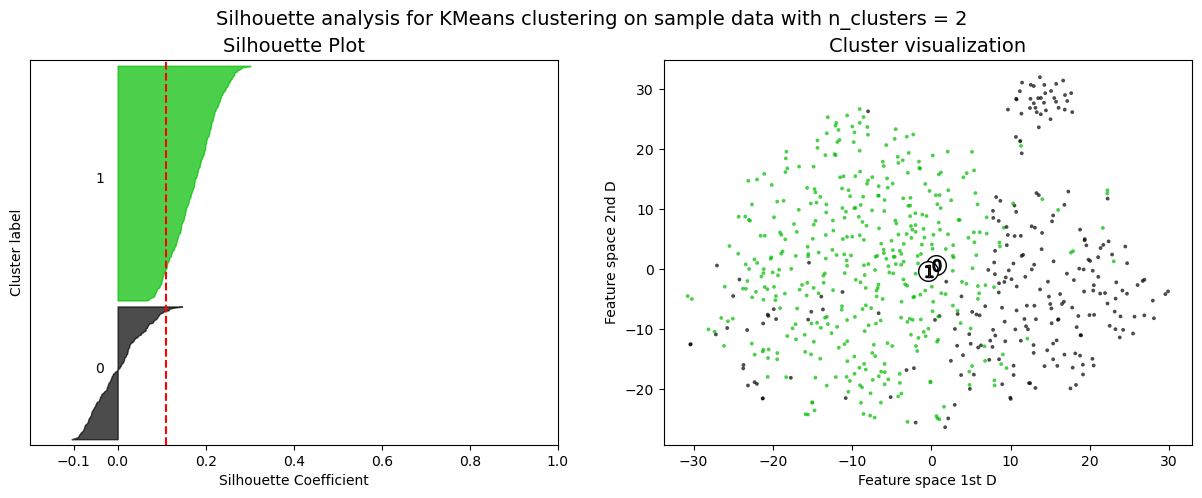

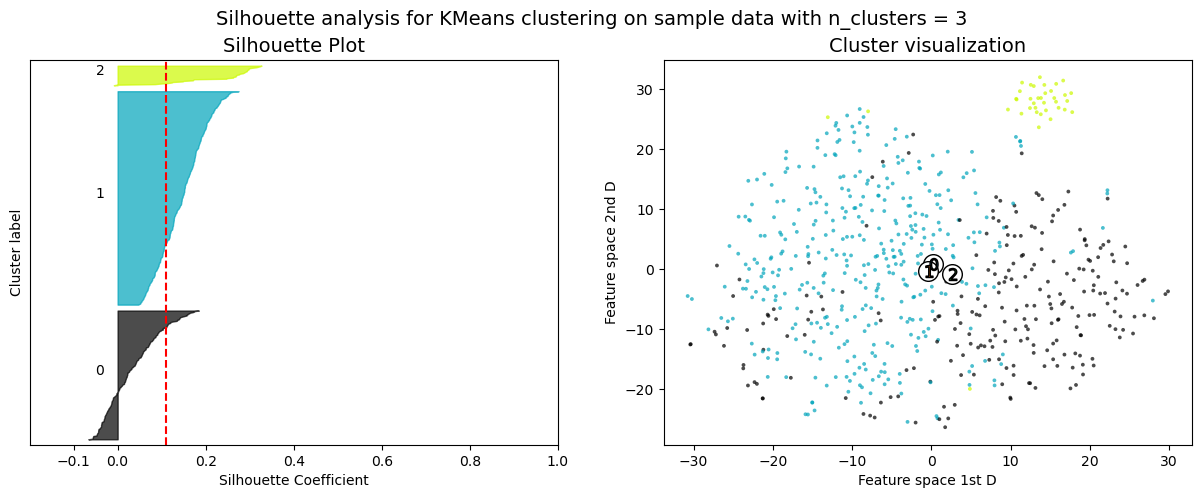

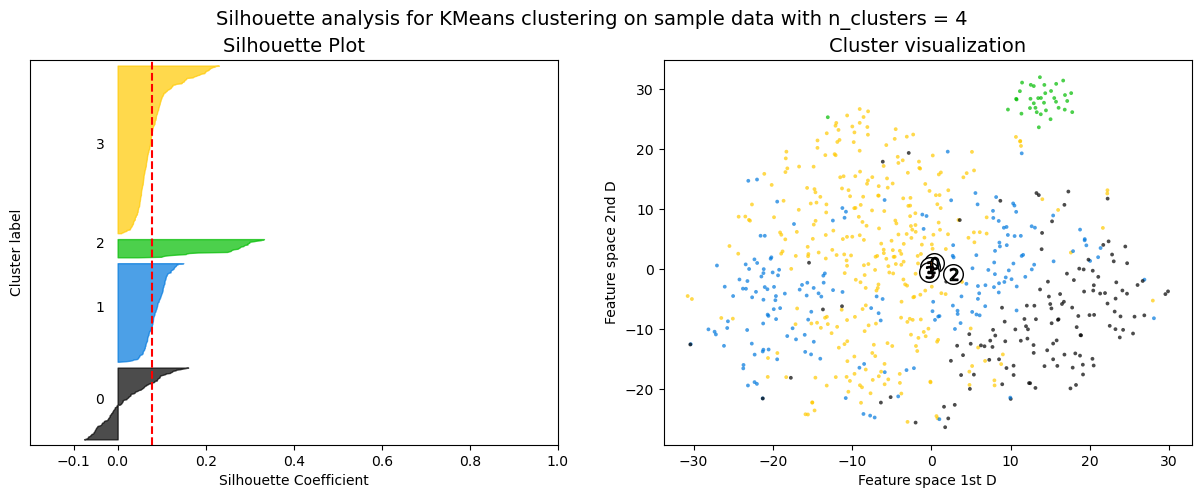

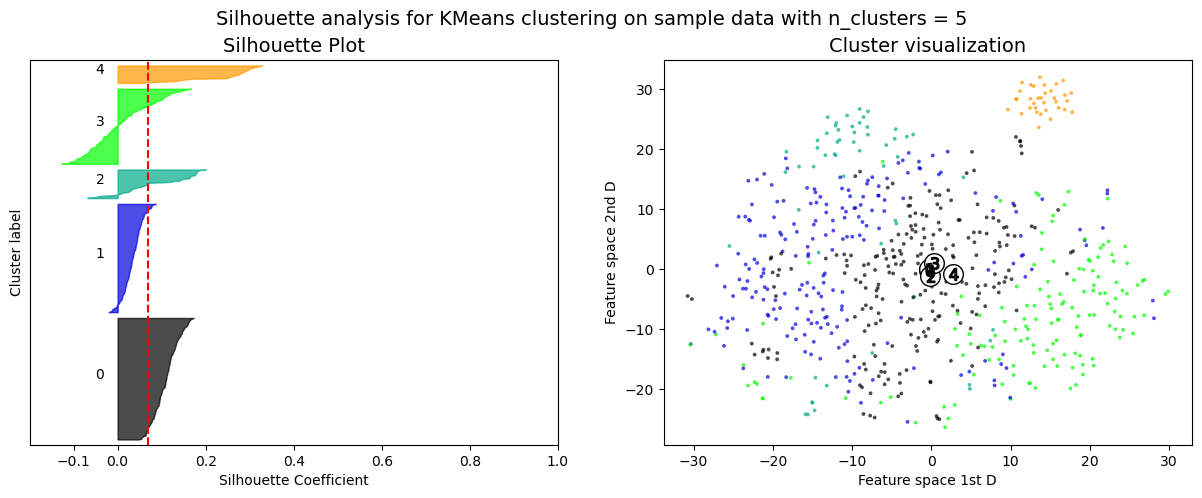

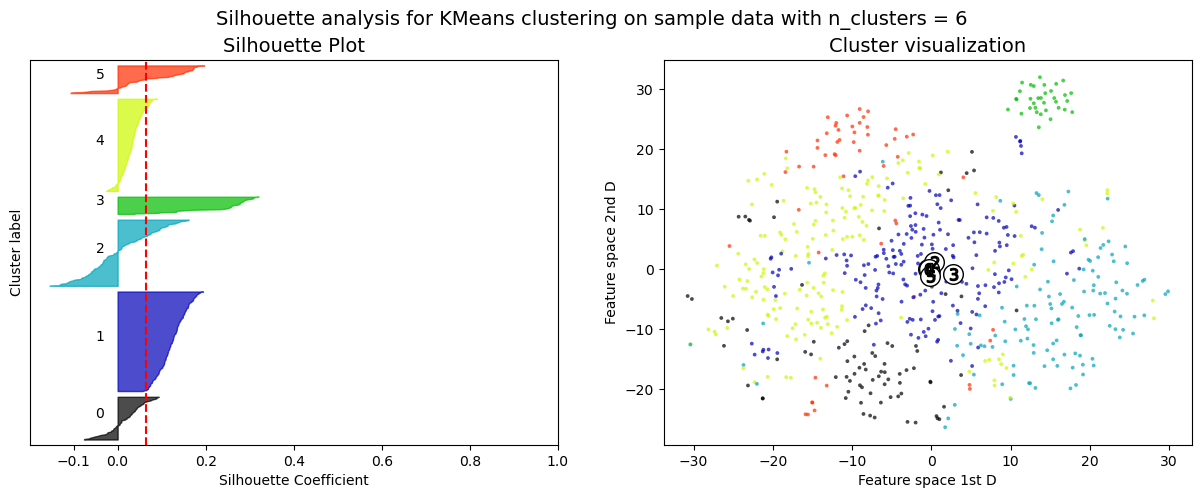

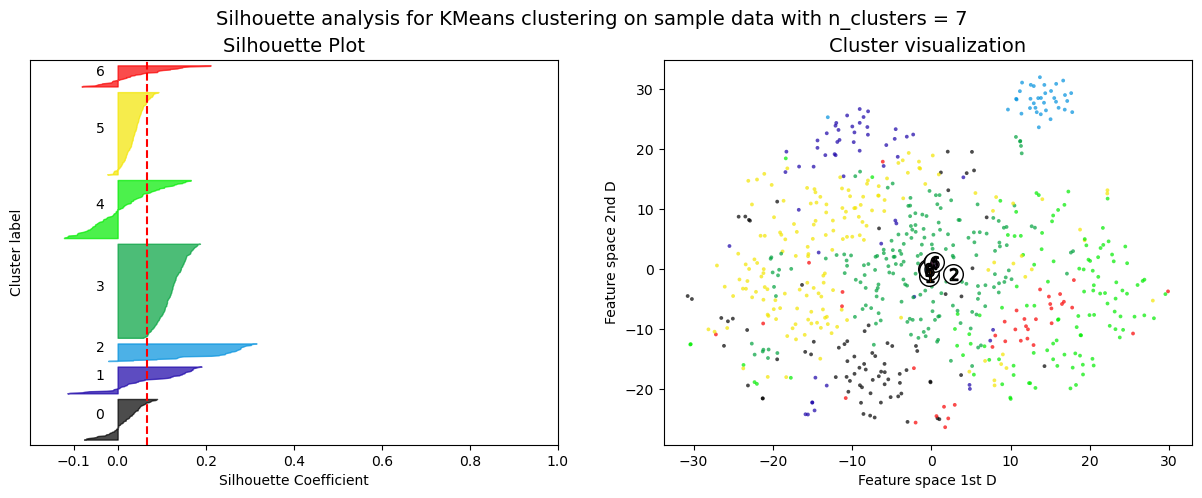

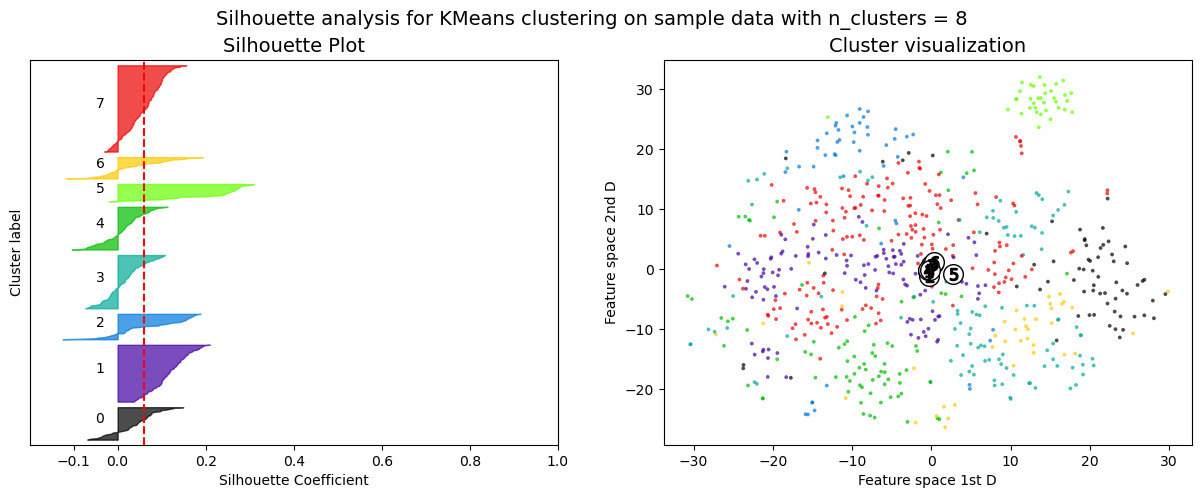

In [78]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

db_score_lista = []
ch_score_lista = []
silhouette_score_lista = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    ax1.set_xlim([-.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(embeddings) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(embeddings)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(embeddings, cluster_labels, metric='euclidean')
    print(
        ">>>>> For n_clusters =",
        n_clusters,
    )

    db_score = davies_bouldin_score(embeddings, cluster_labels)
    ch_score = calinski_harabasz_score(embeddings, cluster_labels)
    sample_silhouette_values = silhouette_samples(embeddings, cluster_labels)

    db_score_lista.append(db_score)
    ch_score_lista.append(ch_score)
    silhouette_score_lista.append(sample_silhouette_values)
    
    print(f"Avg Silhouette Coefficient (+): {silhouette_avg:>11.3f}")
    print(f'Davies Bouldin Score (-): {db_score:>17.3f}')
    print(f'Calinski-Harabsz Score (+): {ch_score:>16.3f}')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot", fontsize=14)
    ax1.set_xlabel("Silhouette Coefficient", fontsize=10)
    ax1.set_ylabel("Cluster label", fontsize=10)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        tsne_results[:, 0], tsne_results[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("Cluster visualization", fontsize=14)
    ax2.set_xlabel("Feature space 1st D", fontsize=10)
    ax2.set_ylabel("Feature space 2nd D", fontsize=10)

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        #fontweight="bold",
    )

plt.show()

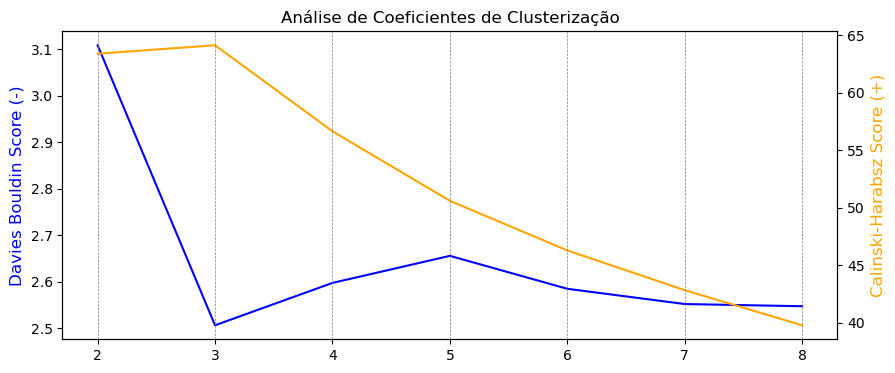

In [79]:
fig, ax1 = plt.subplots(figsize=(10, 4))
#silhouette_score_lista.append(sample_silhouette_values)
ax1.plot(range_n_clusters, db_score_lista, color='blue', linewidth=1.5)
ax1.set_ylabel('Davies Bouldin Score (-)', color='blue', fontsize=12)
ax2 = ax1.twinx()
ax2.plot(range_n_clusters, ch_score_lista, color='orange', linewidth=1.5)
ax2.set_ylabel('Calinski-Harabsz Score (+)', color='orange', fontsize=12)
for n in range_n_clusters:
    plt.axvline(x=n, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Clusters", fontsize=14)
plt.title('Análise de Coeficientes de Clusterização')
plt.show()

### X.X.X. Outros métodos

In [80]:
from kneed import KneeLocator
from sklearn import metrics
from sklearn.metrics import silhouette_score

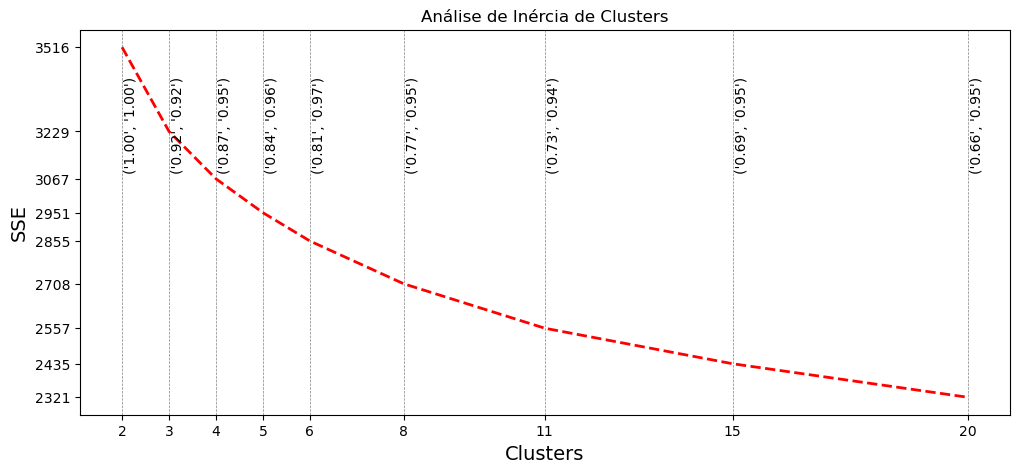

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5, 6, 8, 11, 15, 20]

sse = []
percentuais_step = []
percentuais_acumulados = []
valores = []

plt.figure(figsize=(12, 5))

x = 0
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(embeddings)
    sse.append(kmeans.inertia_)
    percentual_step = (sse[x]/sse[x-1])
    percentual_acumulado = (sse[x]/sse[0])
    valores.append(("{:.2f}".format(percentual_acumulado),"{:.2f}".format(percentual_step)))
    #print(f'{sse[0]} {sse[x]}')
    #print(f'{percentual_step} {percentual_acumulado}')
    plt.axvline(x=k, color='gray', linestyle='--', linewidth=0.5)
    plt.text((k + 0.05), (max(sse) * 0.88), valores[x], rotation=90, fontsize=10)
    x += 1

plt.plot(range_n_clusters, sse, linestyle='--', color='red', linewidth=2)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.xticks(range_n_clusters)
plt.yticks(sse)
plt.xlabel("Clusters", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.title('Análise de Inércia de Clusters')
plt.show()

# X. Modelos

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn_extra.cluster import KMedoids

from sklearn import metrics
import matplotlib.pyplot as plt

## X.X. DBSCAN

- Parameters: neighborhood size
- Scalability: Very large n_samples, medium n_clusters
- Usecase: Non-flat geometry, uneven cluster sizes, outlier removal, transductive
- Geometry (metric used): Distances between nearest points

https://scikit-learn.org/stable/modules/clustering.html#dbscan











The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

The DBSCAN algorithm is deterministic, always generating the same clusters when given the same data in the same order. However, the results can differ when data is provided in a different order. First, even though the core samples will always be assigned to the same clusters, the labels of those clusters will depend on the order in which those samples are encountered in the data. Second and more importantly, the clusters to which non-core samples are assigned can differ depending on the data order. This would happen when a non-core sample has a distance lower than eps to two core samples in different clusters. By the triangular inequality, those two core samples must be more distant than eps from each other, or they would be in the same cluster. The non-core sample is assigned to whichever cluster is generated first in a pass through the data, and so the results will depend on the data ordering.

Memory consumption for large sample sizes

This implementation is by default not memory efficient because it constructs a full pairwise similarity matrix in the case where kd-trees or ball-trees cannot be used (e.g., with sparse matrices). This matrix will consume 
 floats. A couple of mechanisms for getting around this are:

Use OPTICS clustering in conjunction with the extract_dbscan method. OPTICS clustering also calculates the full pairwise matrix, but only keeps one row in memory at a time (memory complexity n).

A sparse radius neighborhood graph (where missing entries are presumed to be out of eps) can be precomputed in a memory-efficient way and dbscan can be run over this with metric='precomputed'. See sklearn.neighbors.NearestNeighbors.radius_neighbors_graph.

The dataset can be compressed, either by removing exact duplicates if these occur in your data, or by using BIRCH. Then you only have a relatively small number of representatives for a large number of points. You can then provide a sample_weight when fitting DBSCAN.

In [125]:
dbscan = DBSCAN(
    eps=2.15,             # The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster.
                        # This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
    min_samples=2,      # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
                        # If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
    metric='euclidean', # The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter.
                        # If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors for DBSCAN.
    metric_params=None, # Additional keyword arguments for the metric function.
    algorithm='auto',   # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
                        # The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.
    leaf_size=50,       # Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
    p=None,             # The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2 (equivalent to the Euclidean distance).
    n_jobs=None         # The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
)

The worst case memory complexity of DBSCAN is O(n2), which can occur when the eps param is large and min_samples is low.

This implementation bulk-computes all neighborhood queries, which increases the memory complexity to O(n.d) where d is the average number of neighbors, while original DBSCAN had memory complexity O(n). It may attract a higher memory complexity when querying these nearest neighborhoods, depending on the algorithm.

One way to avoid the query complexity is to pre-compute sparse neighborhoods in chunks using NearestNeighbors.radius_neighbors_graph with mode='distance', then using metric='precomputed' here.

Another way to reduce memory and computation time is to remove (near-)duplicate points and use sample_weight instead.

In [95]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

X, _ = make_blobs(n_samples=1000, centers=3, random_state=42)

param_grid = {'eps': [0.1, 0.5, 1.0],
              'min_samples': range(2,10,1)}

#np.random.normal(loc=2.4, scale=.35, size=10)
best_score = -1
best_params = {}
n_cluster_alvo = 4

for params in ParameterGrid(param_grid):
    labels = DBSCAN(**params).fit_predict(embeddings)
    conjunto_labels = set(labels)
    ocorrencias = {}
    for valor in labels:
        ocorrencias[valor] = ocorrencias.get(valor, 0) + 1
    print(params)
    print(ocorrencias)
    
    #ch_score = calinski_harabasz_score(embeddings, labels)
    #db_score = davies_bouldin_score(embeddings, labels)
    print(ch_score)
    print(db_score)
    score = len(ocorrencias)

    if score > best_score:
        best_score = ch_score
        best_params = params

print("Melhores parâmetros:", best_params)
print("Melhor pontuação de silhueta:", best_score)
labels = DBSCAN(best_params).fit_predict(embeddings)
conjunto_labels = set(labels)
ocorrencias = {}
for valor in labels:
    ocorrencias[valor] = ocorrencias.get(valor, 0) + 1
print(ocorrencias)

{'eps': 0.1, 'min_samples': 2}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 3}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 4}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 5}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 6}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 7}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 8}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.1, 'min_samples': 9}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.5, 'min_samples': 2}
{-1: 667, 0: 2}
52.45382223435991
2.99723136718106
{'eps': 0.5, 'min_samples': 3}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.5, 'min_samples': 4}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.5, 'min_samples': 5}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps': 0.5, 'min_samples': 6}
{-1: 669}
52.45382223435991
2.99723136718106
{'eps'

InvalidParameterError: The 'eps' parameter of DBSCAN must be a float in the range (0.0, inf). Got {'eps': 0.1, 'min_samples': 2} instead.

## X.X. HDBSCAN

- Parameters: minimum cluster membership, minimum point neighbors
- Scalability: large n_samples, medium n_clusters
- Usecase: Non-flat geometry, uneven cluster sizes, outlier removal, transductive, hierarchical, variable cluster density
- Geometry (metric used): Distances between nearest points

https://scikit-learn.org/stable/modules/clustering.html#hdbscan

The HDBSCAN algorithm can be seen as an extension of DBSCAN and OPTICS. Specifically, DBSCAN assumes that the clustering criterion (i.e. density requirement) is globally homogeneous. In other words, DBSCAN may struggle to successfully capture clusters with different densities. HDBSCAN alleviates this assumption and explores all possible density scales by building an alternative representation of the clustering problem.

HDBSCAN can be seen as an algorithm which performs DBSCAN* clustering across all values of EPSILON.

As mentioned prior, this is equivalent to finding the connected components of the mutual reachability graphs for all values of EPSILON. To do this efficiently, HDBSCAN first extracts a minimum spanning tree (MST) from the fully -connected mutual reachability graph, then greedily cuts the edges with highest weight. An outline of the HDBSCAN algorithm is as follows:

1. Extract the MST of Gms.
2. Extend the MST by adding a “self edge” for each vertex, with weight equal to the core distance of the underlying sample.
3. Initialize a single cluster and label for the MST.
4. Remove the edge with the greatest weight from the MST (ties are removed simultaneously).
5. Assign cluster labels to the connected components which contain the end points of the now-removed edge. If the component does not have at least one edge it is instead assigned a “null” label marking it as noise.
6. Repeat 4-5 until there are no more connected components.

HDBSCAN is therefore able to obtain all possible partitions achievable by DBSCAN* for a fixed choice of min_samples in a hierarchical fashion.

Indeed, this allows HDBSCAN to perform clustering across multiple densities and as such it no longer needs to be given as a hyperparameter. Instead it relies solely on the choice of min_samples, which tends to be a more robust hyperparameter.

HDBSCAN can be smoothed with an additional hyperparameter min_cluster_size which specifies that during the hierarchical clustering, components with fewer than minimum_cluster_size many samples are considered noise. In practice, one can set minimum_cluster_size = min_samples to couple the parameters and simplify the hyperparameter space.

In [85]:
hdbscan = HDBSCAN(
    min_cluster_size=3,             # The minimum number of samples in a group for that group to be considered a cluster; groupings smaller than this size will be left as noise.
    min_samples=2,               # The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself. When None, defaults to min_cluster_size.
    cluster_selection_epsilon=8,  # A distance threshold. Clusters below this value will be merged. See [5] for more information.
    max_cluster_size=300,          # A limit to the size of clusters returned by the "eom" cluster selection algorithm. There is no limit when max_cluster_size=None. Has no effect if cluster_selection_method="leaf".
    metric='euclidean',             # The metric to use when calculating distance between instances in a feature array.
                                    # If metric is a string or callable, it must be one of the options allowed by pairwise_distances for its metric parameter.
                                    # If metric is “precomputed”, X is assumed to be a distance matrix and must be square.#
    metric_params=None,             # Arguments passed to the distance metric.
    alpha=2.0,                      # A distance scaling parameter as used in robust single linkage. See [3] for more information.
    algorithm='auto',               # {“auto”, “brute”, “kd_tree”, “ball_tree”}, default=”auto”
                                    # Exactly which algorithm to use for computing core distances; By default this is set to "auto" which attempts to use a KDTree tree if possible, otherwise it uses a BallTree tree. Both "kd_tree" and "ball_tree" algorithms use the NearestNeighbors estimator.
                                    # If the X passed during fit is sparse or metric is invalid for both KDTree and BallTree, then it resolves to use the "brute" algorithm.
    leaf_size=100,                   # Leaf size for trees responsible for fast nearest neighbour queries when a KDTree or a BallTree are used as core-distance algorithms.
                                    # A large dataset size and small leaf_size may induce excessive memory usage. If you are running out of memory consider increasing the leaf_size parameter. Ignored for algorithm="brute".
    n_jobs=None,                    # Number of jobs to run in parallel to calculate distances. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
    cluster_selection_method='eom', # {“eom”, “leaf”}, default=”eom”
                                    # The method used to select clusters from the condensed tree. The standard approach for HDBSCAN* is to use an Excess of Mass ("eom") algorithm to find the most persistent clusters.
                                    # Alternatively you can instead select the clusters at the leaves of the tree – this provides the most fine grained and homogeneous clusters.
    allow_single_cluster=False,     # By default HDBSCAN* will not produce a single cluster, setting this to True will override this and allow single cluster results in the case that you feel this is a valid result for your dataset.
    store_centers=None,             # Which, if any, cluster centers to compute and store. The options are:
                                    # None which does not compute nor store any centers.
                                    # "centroid" which calculates the center by taking the weighted average of their positions. Note that the algorithm uses the euclidean metric and does not guarantee that the output will be an observed data point. 
                                    # "medoid" which calculates the center by taking the point in the fitted data which minimizes the distance to all other points in the cluster. This is slower than “centroid” since it requires computing additional pairwise distances between points of the same cluster but guarantees the output is an observed data point. The medoid is also well-defined for arbitrary metrics, and does not depend on a euclidean metric.
                                    # "both" which computes and stores both forms of centers.
    copy=False                      # If copy=True then any time an in-place modifications would be made that would overwrite data passed to fit, a copy will first be made, guaranteeing that the original data will be unchanged.
                                    # Currently, it only applies when metric="precomputed", when passing a dense array or a CSR sparse matrix and when algorithm="brute".
    )

## X.X. K-means

- Parameters: number of clusters
- Scalability: Very large n_samples, medium n_clusters with MiniBatch code
- Usecase: General-purpose, even cluster size, flat geometry, not too many clusters, inductive
- Geometry (metric used): Distances between points

https://scikit-learn.org/stable/modules/clustering.html#k-means

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean MUj of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

In [86]:
kmeans = KMeans(
    n_clusters=3,       # The number of clusters to form as well as the number of centroids to generate.
    init='k-means++',   # {‘k-means++’, ‘random’}, 
                        # ‘k-means++’ selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia.
                        # This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
                        # ‘random’ choose n_clusters observations (rows) at random from data for the initial centroids.
    n_init=300,      # Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia.
                        # Several runs are recommended for sparse high-dimensional problems (see Clustering sparse data with k-means).
    max_iter=3500,       # Maximum number of iterations of the k-means algorithm for a single run.
    tol=0.0001,         # Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    verbose=0,          # Verbosity mode.
    random_state=None,  # Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.
    copy_x=True,        # When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified.
                        # If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False.
                        # If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.
    algorithm='lloyd'   # {“lloyd”, “elkan”}
                        # The classical EM-style algorithm is "lloyd". The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality.
                        # However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).
    )

The average complexity is given by O(k n T), where n is the number of samples and T is the number of iteration.

The worst case complexity is given by O(n^(k+2/p)) with n = n_samples, p = n_features. 

In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

If the algorithm stops before fully converging (because of tol or max_iter), labels_ and cluster_centers_ will not be consistent, i.e. the cluster_centers_ will not be the means of the points in each cluster. Also, the estimator will reassign labels_ after the last iteration to make labels_ consistent with predict on the training set.

### Dicas
- To deal with unevenly sized blobs one can increase the number of random initializations. In this case we set n_init=10 to avoid finding a sub-optimal local minimum. For more details see Clustering sparse data with k-means.

## X.X. KMedoids

In [87]:
kmedoids = KMedoids(
    n_clusters=3,       # The number of clusters to form as well as the number of medoids to generate.
    metric='euclidean', # What distance metric to use. See :func:metrics.pairwise_distances metric can be ‘precomputed’, the user must then feed the fit method with a precomputed kernel matrix and not the design matrix X.
    method='pam',       # method='pam',  # Which algorithm to use. ‘alternate’ is faster while ‘pam’ is more accurate.
    max_iter=3500,       # Specify the maximum number of iterations when fitting. It can be zero in which case only the initialization is computed which may be suitable for large datasets when the initialization is sufficiently efficient (i.e. for ‘build’ init).
    init='k-medoids++',   # {‘random’, ‘heuristic’, ‘k-medoids++’, ‘build’}
                        # ‘random’ selects n_clusters elements from the dataset.
                        # ‘heuristic’ picks the n_clusters points with the smallest sum distance to every other point.
                        # ‘k-medoids++’ follows an approach based on k-means++_, and in general, gives initial medoids which are more separated than those generated by the other methods.
                        # ‘build’ is a greedy initialization of the medoids used in the original PAM algorithm. Often ‘build’ is more efficient but slower than other initializations on big datasets and it is also very non-robust, if there are outliers in the dataset, use another initialization. 
    random_state=None,  # Specify random state for the random number generator. Used to initialise medoids when init=’random’.
)

## X.X. Gaussian Mixture

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data. A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data. Given test data, it can assign to each sample the Gaussian it most probably belongs to using the GaussianMixture.predict method.

https://scikit-learn.org/stable/modules/mixture.html#gmm

Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution.

Pros:
- Speed: It is the fastest algorithm for learning mixture models
- Agnostic: As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

Cons:

- Singularities: When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
- Number of components: This algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.

The main difficulty in learning Gaussian mixture models from unlabeled data is that one usually doesn’t know which points came from which latent component (if one has access to this information it gets very easy to fit a separate Gaussian distribution to each set of points).

Expectation-maximization is a well-founded statistical algorithm to get around this problem by an iterative process.

First one assumes random components (randomly centered on data points, learned from k-means, or even just normally distributed around the origin) and computes for each point a probability of being generated by each component of the model. Then, one tweaks the parameters to maximize the likelihood of the data given those assignments. Repeating this process is guaranteed to always converge to a local optimum.

In [88]:
gm = GaussianMixture(
    n_components=3, # The number of mixture components.
    covariance_type='spherical',
    # 'full’:               each component has its own general covariance matrix.
    #                       Although one would expect full covariance to perform best in general, it is prone to overfitting on small datasets and does not generalize well to held out test data.
    # ‘tied’:               all components share the same general covariance matrix.
    # ‘diag’:               each component has its own diagonal covariance matrix.
    # ‘spherical’:          each component has its own single variance.
    tol=0.0001,              # The convergence threshold. EM iterations will stop when the lower bound average gain is below this threshold.
    reg_covar=1e-06,        # Non-negative regularization added to the diagonal of covariance. Allows to assure that the covariance matrices are all positive.
    max_iter=3500,           # The number of EM iterations to perform.
    n_init=300,               # The number of initializations to perform. The best results are kept.
    init_params='k-means++',
    # ‘kmeans’:             This applies a traditional k-means clustering algorithm. This can be computationally expensive compared to other initialization methods.
    # ‘k-means++’:          This will pick the first center at random from the data. Subsequent centers will be chosen from a weighted distribution of the data favouring points further away from existing centers.
    #                       k-means++ is the default initialization for k-means so will be quicker than running a full k-means but can still take a significant amount of time for large data sets with many components.
    # ‘random’:             Centers are chosen as a small perturbation away from the mean of all data. This method is simple but can lead to the model taking longer to converge.
    # ‘random_from_data’:   This will pick random data points from the input data as the initial centers. This is a very fast method of initialization but can produce non-convergent results if the chosen points are too close to each other.
    weights_init=None,      # The user-provided initial weights. If it is None, weights are initialized using the init_params method.
    means_init=None,        # The user-provided initial means, If it is None, means are initialized using the init_params method.
    precisions_init=None,
                            # The user-provided initial precisions (inverse of the covariance matrices). If it is None, precisions are initialized using the ‘init_params’ method. The shape depends on ‘covariance_type’:
    # (n_components,)                        if 'spherical',
    # (n_features, n_features)               if 'tied',
    # (n_components, n_features)             if 'diag',
    # (n_components, n_features, n_features) if 'full'
    random_state=None,      # Controls the random seed given to the method chosen to initialize the parameters (see init_params).
                            # In addition, it controls the generation of random samples from the fitted distribution (see the method sample). Pass an int for reproducible output across multiple function calls.
    warm_start=False,       # If ‘warm_start’ is True, the solution of the last fitting is used as initialization for the next call of fit(). This can speed up convergence when fit is called several times on similar problems.
                            # In that case, ‘n_init’ is ignored and only a single initialization occurs upon the first call. See the Glossary.
    verbose=0,              # Enable verbose output. If 1 then it prints the current initialization and each iteration step. If greater than 1 then it prints also the log probability and the time needed for each step.
    verbose_interval=100     # Number of iteration done before the next print.
)

## X.X. Bayesian Gaussian Mixture

Variational Bayesian estimation of a Gaussian mixture.

This class allows to infer an approximate posterior distribution over the parameters of a Gaussian mixture distribution. The effective number of components can be inferred from the data.

This class implements two types of prior for the weights distribution: a finite mixture model with Dirichlet distribution and an infinite mixture model with the Dirichlet Process. In practice Dirichlet Process inference algorithm is approximated and uses a truncated distribution with a fixed maximum number of components (called the Stick-breaking representation). The number of components actually used almost always depends on the data.

In [89]:
bgm = BayesianGaussianMixture(
    n_components=3,         # The number of mixture components.
                            # Depending on the data and the value of the weight_concentration_prior the model can decide to not use all the components by setting some component weights_ to values very close to zero.
                            # The number of effective components is therefore smaller than n_components.
    covariance_type='spherical',
        #'full' (each component has its own general covariance matrix),
        #'tied' (all components share the same general covariance matrix),
        #'diag' (each component has its own diagonal covariance matrix),
        #'spherical' (each component has its own single variance).
    tol=0.001,          # The convergence threshold. EM iterations will stop when the lower bound average gain on the likelihood (of the training data with respect to the model) is below this threshold.
    reg_covar=1e-06,    # Non-negative regularization added to the diagonal of covariance. Allows to assure that the covariance matrices are all positive.
    max_iter=3500,       # The number of EM iterations to perform.
    n_init=150,           # The number of initializations to perform. The result with the highest lower bound value on the likelihood is kept.
    init_params='kmeans',   # ‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’}
                            # The method used to initialize the weights, the means and the covariances. String must be one of:
                            # ‘kmeans’ : responsibilities are initialized using kmeans.
                            # ‘k-means++’ : use the k-means++ method to initialize.
                            # ‘random’ : responsibilities are initialized randomly.
                            # ‘random_from_data’ : initial means are randomly selected data points.
    weight_concentration_prior_type='dirichlet_process',
                        # {‘dirichlet_process’, ‘dirichlet_distribution’}, default=’dirichlet_process’
                        # String describing the type of the weight concentration prior.
    weight_concentration_prior=None,
        # The dirichlet concentration of each component on the weight distribution (Dirichlet). This is commonly called gamma in the literature.
        # The higher concentration puts more mass in the center and will lead to more components being active, while a lower concentration parameter will lead to more mass at the edge of the mixture weights simplex.
        # The value of the parameter must be greater than 0. If it is None, it’s set to 1. / n_components.
    mean_precision_prior=None,
    mean_prior=None,
    degrees_of_freedom_prior=None,
    covariance_prior=None,
    random_state=None,
    warm_start=False,   # If ‘warm_start’ is True, the solution of the last fitting is used as initialization for the next call of fit().
                        # This can speed up convergence when fit is called several times on similar problems. See the Glossary.
    verbose=0,
    verbose_interval=10
    )


## X.X. Structured Hierarchical Agglomeration

In [90]:
lista_passos = [round(embeddings.shape[0]/200 * i) for i in range(1, 11)]
lista_passos
best_ch_score = None #-
best_db_score = None #+
best_params = None
ch_score_lista = []
db_score_lista = []
print(lista_passos)
for n in lista_passos:
    connectivity = kneighbors_graph(embeddings, n_neighbors=n, include_self=False)
    aglomerative = AgglomerativeClustering(
        n_clusters=3,
        metric='euclidean',
        memory=None,
        connectivity=connectivity,  # Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data.
                                    # This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph.
                                    # Default is None, i.e, the hierarchical clustering algorithm is unstructured.
        compute_full_tree=True,   # Stop early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples.
                                    # This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree.
                                    # It must be True if distance_threshold is not None. By default compute_full_tree is “auto”, which is equivalent to True when distance_threshold is not None or that n_clusters is inferior to the maximum between 100 or 0.02 * n_samples. Otherwise, “auto” is equivalent to False.
        linkage='ward',             # {‘ward’, ‘complete’, ‘average’, ‘single’}
                                    # The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
                                    # ‘ward’ minimizes the variance of the clusters being merged.
                                    # ‘average’ uses the average of the distances of each observation of the two sets.
                                    # ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
                                    # ‘single’ uses the minimum of the distances between all observations of the two sets.
        distance_threshold=None,    # The linkage distance threshold at or above which clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.
        compute_distances=False     # Computes distances between clusters even if distance_threshold is not used. This can be used to make dendrogram visualization, but introduces a computational and memory overhead.
    )
    labels = aglomerative.fit_predict(embeddings)
    if len(set(labels)) <= 1:
        db_score = 0
        ch_score = 0
    if len(set(labels)) > 1:
        db_score = davies_bouldin_score(embeddings, labels)
        ch_score = calinski_harabasz_score(embeddings, labels)

    db_score_lista.append(db_score)
    ch_score_lista.append(ch_score)

    if (best_ch_score == None):
        best_ch_score = ch_score
        best_db_score = db_score
        best_params = n

    if (ch_score > best_ch_score) and (db_score < best_db_score):
        best_ch_score = ch_score
        best_db_score = db_score
        best_params = n

print(f'Calinski-Harabsz Score (+) {best_ch_score}')
print(f'Davies Bouldin Score (-) {best_db_score}')
print(f'Melhor N Vizinhos {best_params}')


[3, 7, 10, 13, 17, 20, 23, 27, 30, 33]
Calinski-Harabsz Score (+) 52.05968978079648
Davies Bouldin Score (-) 2.5989411796946817
Melhor N Vizinhos 3


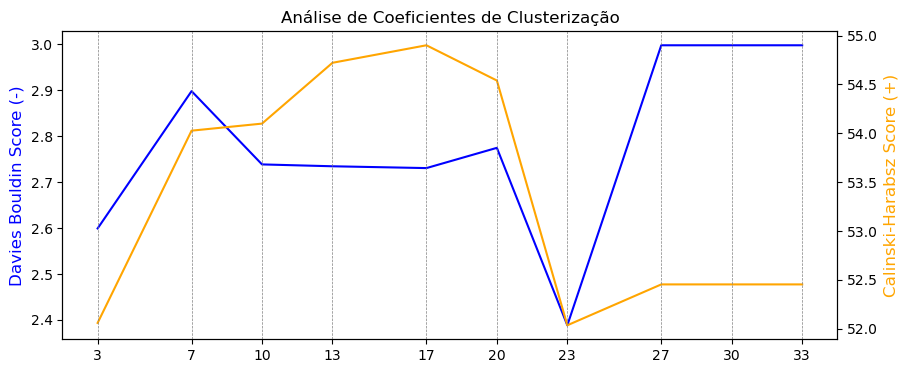

In [91]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(lista_passos, db_score_lista, color='blue', linewidth=1.5)
ax1.set_ylabel('Davies Bouldin Score (-)', color='blue', fontsize=12)
ax2 = ax1.twinx()
ax2.plot(lista_passos, ch_score_lista, color='orange', linewidth=1.5)
ax2.set_ylabel('Calinski-Harabsz Score (+)', color='orange', fontsize=12)
for n in lista_passos:
    plt.axvline(x=n, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Vizinhos", fontsize=14)
plt.xticks(lista_passos)
plt.title('Análise de Coeficientes de Clusterização')
plt.show()

In [92]:
connectivity = kneighbors_graph(embeddings, n_neighbors=3, include_self=False)

## Montagem

DBSCAN
Proporções dos clusters para DBSCAN: {-1: '0.208', 0: '0.780', 1: '0.003', 2: '0.003', 3: '0.003', 4: '0.003'}
HDBSCAN
Proporções dos clusters para HDBSCAN: {-1: '1.000'}
GM
Proporções dos clusters para GM: {0: '0.484', 1: '0.052', 2: '0.463'}
KMEANS
Proporções dos clusters para KMEANS: {0: '0.055', 1: '0.354', 2: '0.590'}
KMEDOIDS
Proporções dos clusters para KMEDOIDS: {0: '0.393', 1: '0.309', 2: '0.297'}
AGLOMERATIVE
Proporções dos clusters para AGLOMERATIVE: {0: '0.504', 1: '0.052', 2: '0.444'}


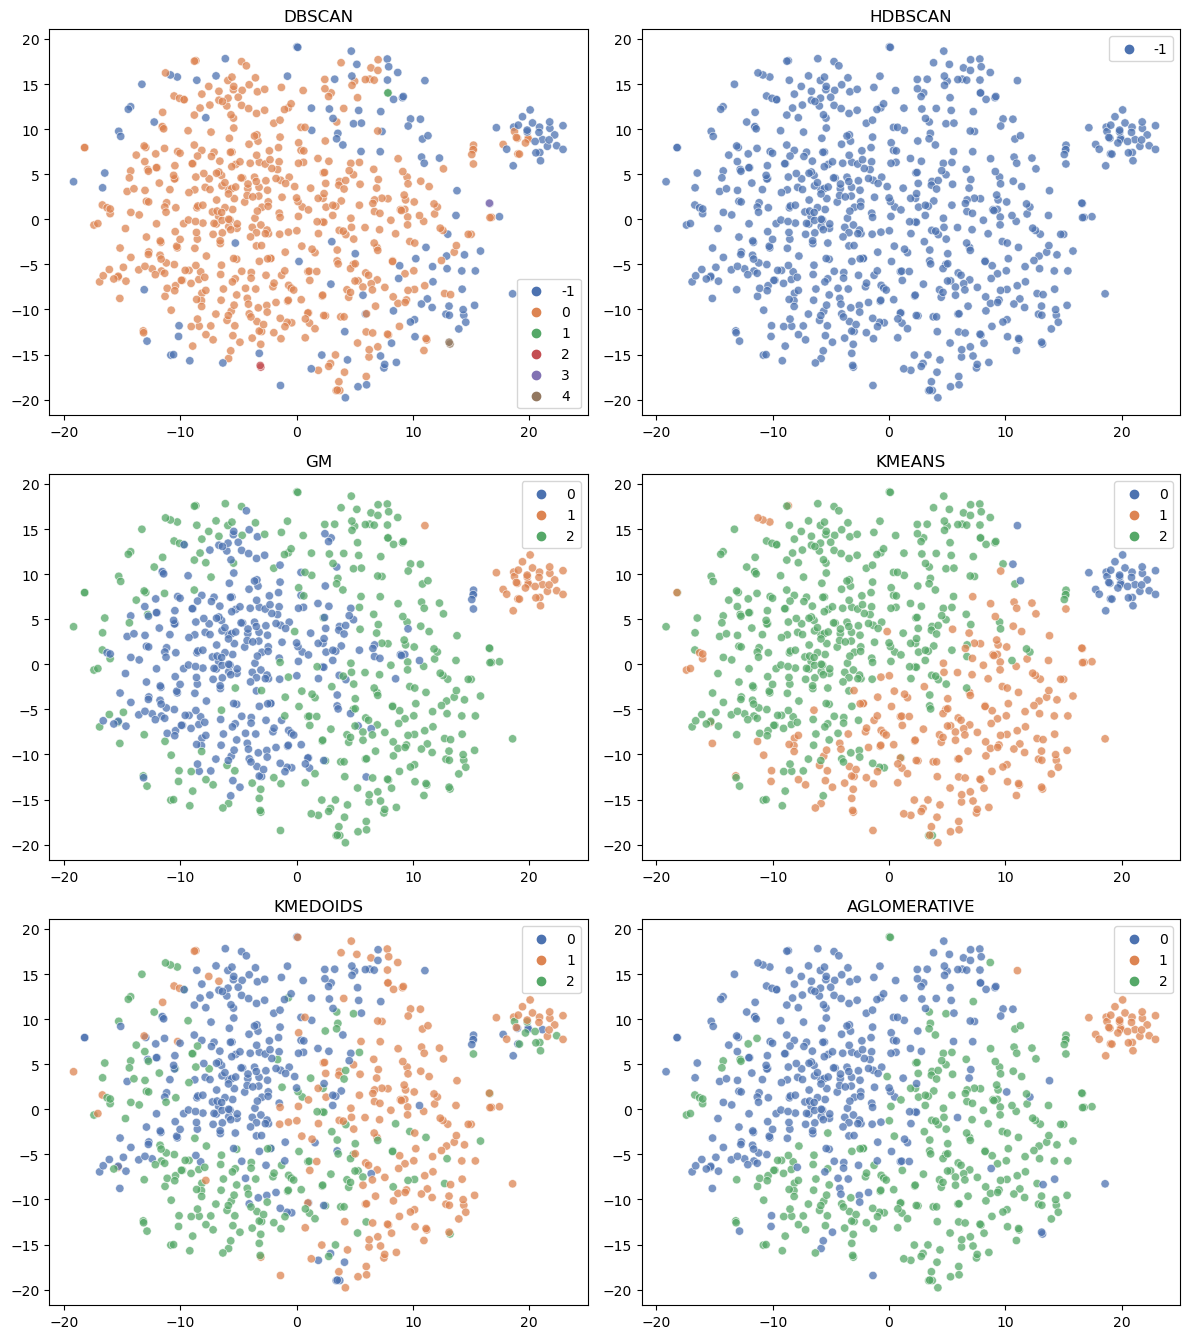

In [126]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import seaborn as sns

#classifiers = [hdbscan, dbscan, gm, bgm, kmeans, aglomerative]
classifiers = [dbscan, hdbscan, gm, kmeans, kmedoids, aglomerative]
#lista_nomes = ['HDBSCAN','DBSCAN','GM','BGM','KMEANS','AGLOMERATIVE']
lista_nomes = ['DBSCAN','HDBSCAN','GM','KMEANS','KMEDOIDS','AGLOMERATIVE']
dict_clf = {}

x = 0
for nome in lista_nomes:
    dict_clf[x] = nome
    x += 1

num_rows = 3
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4.5 * num_rows))

silhuetas = []
sampling = []
sampling_total = []

indices_davies_bouldin = []
indices_calinski_harabasz = []

dict_labels = {}

for i, clf in enumerate(classifiers):
    labels = clf.fit_predict(embeddings)
    dict_labels[i] = labels
    print(lista_nomes[i])

    if len(set(labels)) <= 1:
        db_score = 0
        ch_score = 0
        silhueta = 0
    if len(set(labels)) > 1:
        db_score = davies_bouldin_score(embeddings, labels)
        ch_score = calinski_harabasz_score(embeddings, labels)
        silhueta = silhouette_score(embeddings, labels)
    
    indices_davies_bouldin.append(db_score)
    indices_calinski_harabasz.append(ch_score)
    silhuetas.append(silhueta)

    unique, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique, counts))
    total_samples = len(labels)
    proportions = {cluster: "{:.3f}".format(count / total_samples) for cluster, count in cluster_counts.items()}
    
    print(f"Proporções dos clusters para {dict_clf[i]}: {proportions}")
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.scatterplot(
        data=tsne_results.tolist(),
        x=tsne_results[:, 0], y=tsne_results[:, 1],
        hue=labels,
        palette="deep",
        legend="full",
        alpha=.75,
        hue_norm=(1, 4),
        ax=ax
    )
    ax.set_title(f"{dict_clf[i]}")
    
plt.tight_layout()
plt.show()

In [127]:
for i, (db, ch) in enumerate(zip(indices_davies_bouldin, indices_calinski_harabasz)):
    print(dict_clf[i])
    print(f"Índice Davies-Bouldin (-): {db:.3f}")
    print(f"Índice Calinski-Harabasz (+): {ch:.3f}")
    #print(f"Score de Silhueta (+): {sc:.3f}")

DBSCAN
Índice Davies-Bouldin (-): 2.464
Índice Calinski-Harabasz (+): 7.634
HDBSCAN
Índice Davies-Bouldin (-): 0.000
Índice Calinski-Harabasz (+): 0.000
GM
Índice Davies-Bouldin (-): 3.074
Índice Calinski-Harabasz (+): 51.380
KMEANS
Índice Davies-Bouldin (-): 2.504
Índice Calinski-Harabasz (+): 64.130
KMEDOIDS
Índice Davies-Bouldin (-): 3.641
Índice Calinski-Harabasz (+): 37.358
AGLOMERATIVE
Índice Davies-Bouldin (-): 2.997
Índice Calinski-Harabasz (+): 52.454


Davies-Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

Calinski-Harabasz index - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters. The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

Silhouette Score: Compute the mean Silhouette Coefficient of all samples using the mean intra-cluster distance and the mean nearest-cluster distance for each sample. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

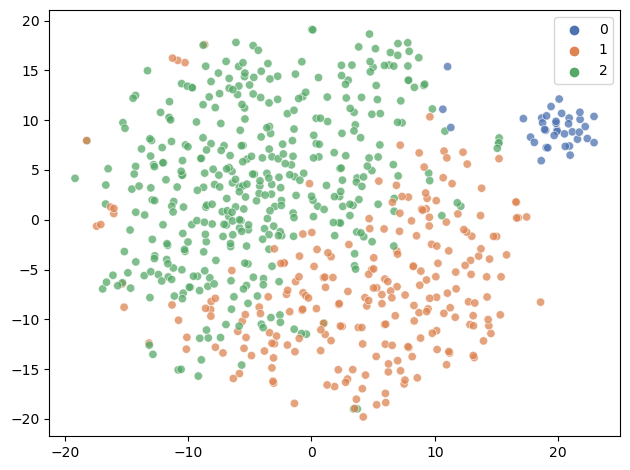

In [128]:
sns.scatterplot(
        data=tsne_results,
        x=tsne_results[:, 0], y=tsne_results[:, 1],
        hue=dict_labels[3],
        palette="deep",
        legend="full",
        alpha=.75,
    )
plt.tight_layout()
plt.show()

In [129]:
dict_val = dict_labels[3]

db_score = davies_bouldin_score(embeddings, dict_val)
ch_score = calinski_harabasz_score(embeddings, dict_val)
sample_silhouette_values = silhouette_samples(embeddings, dict_val)

print(f"Avg Silhouette Coefficient (+): {silhouette_avg:>11.3f}")
print(f'Davies Bouldin Score (-): {db_score:>17.3f}')
print(f'Calinski-Harabsz Score (+): {ch_score:>16.3f}')

Avg Silhouette Coefficient (+):       0.060
Davies Bouldin Score (-):             2.504
Calinski-Harabsz Score (+):           64.130


#### Análise de similaridade estatística entre índices de clusterização

In [36]:
num_clusters = len(np.unique(dict_labels[5]))
score_novos = silhouette_score(embeddings, dict_labels[5])

mapeamento = {}
for cluster_orig in range(num_clusters):
    media_orig = np.mean(embeddings[dict_labels[1] == cluster_orig], axis=0)
    distancias = []
    for cluster_novo in range(num_clusters):
        media_novo = np.mean(embeddings[dict_labels[2] == cluster_novo], axis=0)
        distancia = np.linalg.norm(media_orig - media_novo)
        distancias.append(distancia)

    cluster_novo_correspondente = np.argmin(distancias)
    mapeamento[cluster_novo_correspondente] = cluster_orig

labels_novos_renomeados = [mapeamento[c] for c in dict_labels[2]]

score_novos_renomeados = silhouette_score(embeddings, labels_novos_renomeados)

c:\Users\bruno\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\bruno\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


KeyError: 1

In [37]:
from scipy import stats

silhouette_A = silhouette_samples(embeddings, dict_labels[1])
silhouette_B = silhouette_samples(embeddings, dict_labels[2])

t_statistic, p_value = stats.ttest_ind(silhouette_A, silhouette_B)

print(f"Estatística t: {t_statistic:.5f}")
print(f"Valor-p: {p_value:.5f}")

alpha = 0.05

if p_value < alpha:
    print("Rejeita a hipótese nula: Há uma diferença estatisticamente significativa entre os índices de Silhueta produzidos pelos algoritmos A e B.")
else:
    print("Não rejeita a hipótese nula: Não há uma diferença estatisticamente significativa entre os índices de Silhueta produzidos pelos algoritmos A e B.")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# 4. t-SNE

### Info


### Cons:

- t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes
- The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.
- The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.
- Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using init='pca').
- You cannot see relative sizes of clusters in a t-SNE plot.

### Code

In [102]:
from sklearn.manifold import TSNE

tsne_preliminar = TSNE(
    n_components=2,                 # Dimension of the embedded space.
    #perplexity=30.0,            # The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity.
                                # Consider selecting a value between 5 and 50. Different values can result in significantly different results. The perplexity must be less than the number of samples.
    early_exaggeration=12.0,    # Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them.
                                # For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical.
                                # If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.
    learning_rate='auto',       # The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours.
                                # If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.
                                # Note that many other t-SNE implementations (bhtsne, FIt-SNE, openTSNE, etc.) use a definition of learning_rate that is 4 times smaller than ours. So our learning_rate=200 corresponds to learning_rate=800 in those other implementations. The ‘auto’ option sets the learning_rate to max(N / early_exaggeration / 4, 50) where N is the sample size, following [4] and [5].
    n_iter=15000,                # Maximum number of iterations for the optimization. Should be at least 250.
    n_iter_without_progress=500,# Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration.
                                # Note that progress is only checked every 50 iterations so this value is rounded to the next multiple of 50.   
    min_grad_norm=1e-08,        # If the gradient norm is below this threshold, the optimization will be stopped.
    metric='euclidean',         # The metric to use when calculating distance between instances in a feature array.
                                # If metric is a string, it must be one of the options allowed by scipy.spatial.distance.pdist for its metric parameter, or a metric listed in pairwise.PAIRWISE_DISTANCE_FUNCTIONS.
                                # If metric is “precomputed”, X is assumed to be a distance matrix. Alternatively, if metric is a callable function, it is called on each pair of instances (rows) and the resulting value recorded.
                                # The callable should take two arrays from X as input and return a value indicating the distance between them. The default is “euclidean” which is interpreted as squared euclidean distance.
    metric_params=None,
    init='random',              # {“random”, “pca”} or ndarray of shape (n_samples, n_components), default=”pca”
                                # Initialization of embedding. PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
    verbose=0,
    random_state=None,
    method='barnes_hut',             # ‘barnes_hut’, ‘exact’}, default=’barnes_hut’
                                # By default the gradient calculation algorithm uses Barnes-Hut approximation running in O(NlogN) time.
                                # method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. However, the exact method cannot scale to millions of examples.
    angle=0.05,                  # Only used if method=’barnes_hut’ This is the trade-off between speed and accuracy for Barnes-Hut T-SNE.
                                # ‘angle’ is the angular size (referred to as theta in [3]) of a distant node as measured from a point. If this size is below ‘angle’ then it is used as a summary node of all points contained within it.
                                # This method is not very sensitive to changes in this parameter in the range of 0.2 - 0.8. Angle less than 0.2 has quickly increasing computation time and angle greater 0.8 has quickly increasing error.
    n_jobs=-1                 # The number of parallel jobs to run for neighbors search. This parameter has no impact when metric="precomputed" or (metric="euclidean" and method="exact").
                                # None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
)

### Otimizando a KL divergence

https://scikit-learn.org/stable/modules/manifold.html#t-sne

__The main purpose of t-SNE is visualization of high-dimensional data.__ Hence, it works best when the data will be embedded on two or three dimensions.

Optimizing the KL divergence can be a little bit tricky sometimes. There are five parameters that control the optimization of t-SNE and therefore possibly the quality of the resulting embedding:

- __perplexity__
> __Larger perplexities lead to more nearest neighbors and less sensitive to small structure. Conversely a lower perplexity considers a smaller number of neighbors, and thus ignores more global information in favour of the local neighborhood.__ As dataset sizes get larger more points will be required to get a reasonable sample of the local neighborhood, and hence larger perplexities may be required. Similarly noisier datasets will require larger perplexity values to encompass enough local neighbors to see beyond the background noise.
- __early exaggeration factor__
>The optimization consists of two phases: the early exaggeration phase and the final optimization. During early exaggeration the joint probabilities in the original space will be artificially increased by multiplication with a given factor. Larger factors result in larger gaps between natural clusters in the data. If the factor is too high, the KL divergence could increase during this phase. Usually it does not have to be tuned. 
- __learning rate__
>A critical parameter is the learning rate. If it is too low gradient descent will get stuck in a bad local minimum. If it is too high the KL divergence will increase during optimization. A heuristic suggested in Belkina et al. (2019) is to set the learning rate to the sample size divided by the early exaggeration factor. We implement this heuristic as learning_rate='auto' argument.
- __maximum number of iterations__
>The maximum number of iterations is usually high enough and does not need any tuning. 
- __angle__ (not used in the exact method)
>The last parameter, angle, is a tradeoff between performance and accuracy. Larger angles imply that we can approximate larger regions by a single point, leading to better speed but less accurate results.

### Dicas

- __Make sure the same scale is used over all features.__ Because manifold learning methods are based on a nearest-neighbor search, the algorithm may perform poorly otherwise. See StandardScaler for convenient ways of scaling heterogeneous data.

- The reconstruction error computed by each routine can be used to choose the optimal output dimension. For a -dimensional manifold embedded in a D-dimensional parameter space, the reconstruction error will decrease as n_components is increased until n_components == d.

- Note that noisy data can “short-circuit” the manifold, in essence acting as a bridge between parts of the manifold that would otherwise be well-separated. Manifold learning on noisy and/or incomplete data is an active area of research.

- Certain input configurations can lead to singular weight matrices, for example when more than two points in the dataset are identical, or when the data is split into disjointed groups. In this case, solver='arpack' will fail to find the null space. The easiest way to address this is to use solver='dense' which will work on a singular matrix, though it may be very slow depending on the number of input points. Alternatively, one can attempt to understand the source of the singularity: if it is due to disjoint sets, increasing n_neighbors may help. If it is due to identical points in the dataset, removing these points may help.

- https://distill.pub/2016/misread-tsne/

- The perplexity really should be smaller than the number of points. 

- If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. 

https://www.youtube.com/watch?v=RJVL80Gg3lA

t-SNE captures the local structure of the original data and at the same time, reveals the global structure at different scales [1]. t-SNE
is a variant of Stochastic Neighbor Embedding (SNE) [2] which addresses some of the pitfalls of SNE. Firstly, let us discuss the SNE algorithm which forms the basis
for t-SNE.

SNE converts distances between data points to conditional probabilities. For any two data points xi and x j in high dimensional space d, the conditional probability pj i | is a
measure of how likely it is for xi to choose x j as its neighbor if the neighbors were to be chosen based on their probability density under a Gaussian centered at xi. This is
as if, for any data point xi, we put a Gaussian centered at xi , and based on the density of this Gaussian we decide if other points are its neighbors or not. 

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. __t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.__

It is highly recommended to use another dimensionality reduction method __(e.g. PCA for dense data or TruncatedSVD for sparse data)__ to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

https://scikit-learn.org/stable/modules/manifold.html#t-sne

t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:

- Revealing the structure at many scales on a single map
- Revealing data that lie in multiple, different, manifolds or clusters
- Reducing the tendency to crowd points together at the center

While Isomap, LLE and variants are best suited to unfold a single continuous low dimensional manifold, __t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples as highlighted on the S-curve example.__ This ability to group samples based on the local structure might be beneficial to visually disentangle a dataset that comprises several manifolds at once as is the case in the digits dataset.

The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space will be minimized by gradient descent. Note that the KL divergence is not convex, i.e. multiple restarts with different initializations will end up in local minima of the KL divergence. __Hence, it is sometimes useful to try different seeds and select the embedding with the lowest KL divergence.__

## X.X. Code

In [103]:
from sklearn.manifold import TSNE
from tqdm import tqdm
import time

In [104]:
tsne_preliminar_params = dict(
    n_components=2,
    learning_rate='auto', 
    n_iter=10000, 
    n_iter_without_progress=600,
    min_grad_norm=1e-07,
    #metric='euclidean', #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
    metric_params=None,
    init='random', 
    verbose=1,
    random_state=None,
    method='barnes_hut',
    n_jobs=-1
)

## X.X. Perplexity Values

In [105]:
perplexity_values = [2,3,5,10,12,15,20,30,50,70,85,100]
n_components=2
label_colunas_1 = []
label_colunas_2 = []

for n_perplexity in perplexity_values:
    for i in range(0,2):
        label_colunas_1.append(n_perplexity)
        label_colunas_2.append(i)

df_tsne = pd.DataFrame(columns=[label_colunas_1,label_colunas_2], dtype='float64')
kl_dict = {}
start = time.time()

for n_perplexity in tqdm(perplexity_values):
    start2 = time.time()

    tsne_preliminar = TSNE(perplexity=n_perplexity, early_exaggeration=12.0, angle=.5, **tsne_preliminar_params)
    resultados = tsne_preliminar.fit_transform(embeddings)

    duration2 = time.time() - start2
    kl_dict[n_perplexity] = tsne_preliminar.kl_divergence_
    print(f'>>>>> KL Divergence {n_perplexity}: {tsne_preliminar.kl_divergence_} ({duration2:.3f} segs)')

    for i in range(0,n_components):
        df_tsne[n_perplexity, i] = resultados[:,(i-1)]

duration = time.time() - start

print(f"Duração total {duration:.3f} segs")

diretorio = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
arquivo = 'DF_TSNE_01_PERPLEXITY.parquet'
df_tsne.to_parquet(os.path.join(diretorio, arquivo), engine='pyarrow', compression='gzip')

  0%|          | 0/12 [00:00<?, ?it/s]

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.352680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.735123


  8%|▊         | 1/12 [00:07<01:24,  7.65s/it]

[t-SNE] KL divergence after 10000 iterations: 1.064599
>>>>> KL Divergence 2: 1.064598798751831 (7.649 segs)
[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.476254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.905960


 17%|█▋        | 2/12 [00:15<01:17,  7.75s/it]

[t-SNE] KL divergence after 10000 iterations: 1.303809
>>>>> KL Divergence 3: 1.3038091659545898 (7.811 segs)
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.589291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.583878


 25%|██▌       | 3/12 [00:24<01:16,  8.45s/it]

[t-SNE] KL divergence after 10000 iterations: 1.528439
>>>>> KL Divergence 5: 1.5284391641616821 (9.278 segs)
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.707735
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.901611


 33%|███▎      | 4/12 [00:33<01:09,  8.72s/it]

[t-SNE] KL divergence after 8150 iterations: 1.660742
>>>>> KL Divergence 10: 1.660742163658142 (9.131 segs)
[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.735448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.867355


 42%|████▏     | 5/12 [00:44<01:05,  9.41s/it]

[t-SNE] KL divergence after 10000 iterations: 1.644964
>>>>> KL Divergence 12: 1.6449638605117798 (10.626 segs)
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.135s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.768260
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.379120


 50%|█████     | 6/12 [00:53<00:54,  9.15s/it]

[t-SNE] KL divergence after 8550 iterations: 1.612678
>>>>> KL Divergence 15: 1.6126784086227417 (8.655 segs)
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.809149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.192078


 58%|█████▊    | 7/12 [01:00<00:42,  8.54s/it]

[t-SNE] KL divergence after 7350 iterations: 1.605529
>>>>> KL Divergence 20: 1.6055285930633545 (7.275 segs)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.865482
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.588959


 67%|██████▋   | 8/12 [01:05<00:29,  7.42s/it]

[t-SNE] KL divergence after 4800 iterations: 1.500864
>>>>> KL Divergence 30: 1.500863790512085 (5.020 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.664619


 75%|███████▌  | 9/12 [01:10<00:20,  6.70s/it]

[t-SNE] KL divergence after 3550 iterations: 1.302165
>>>>> KL Divergence 50: 1.3021653890609741 (5.119 segs)
[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.989753
[t-SNE] KL divergence after 100 iterations with early exaggeration: 53.810287


 83%|████████▎ | 10/12 [01:13<00:10,  5.40s/it]

[t-SNE] KL divergence after 1450 iterations: 1.179721
>>>>> KL Divergence 70: 1.1797209978103638 (2.486 segs)
[t-SNE] Computing 256 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 1.022444
[t-SNE] KL divergence after 100 iterations with early exaggeration: 51.605736


 92%|█████████▏| 11/12 [01:15<00:04,  4.55s/it]

[t-SNE] KL divergence after 1450 iterations: 1.114807
>>>>> KL Divergence 85: 1.1148072481155396 (2.612 segs)
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 1.052119
[t-SNE] KL divergence after 100 iterations with early exaggeration: 49.775162


100%|██████████| 12/12 [01:18<00:00,  6.52s/it]

[t-SNE] KL divergence after 1200 iterations: 0.997810
>>>>> KL Divergence 100: 0.9978102445602417 (2.608 segs)
Duração total 78.291 segs


In [106]:
labels = dict_labels[3]

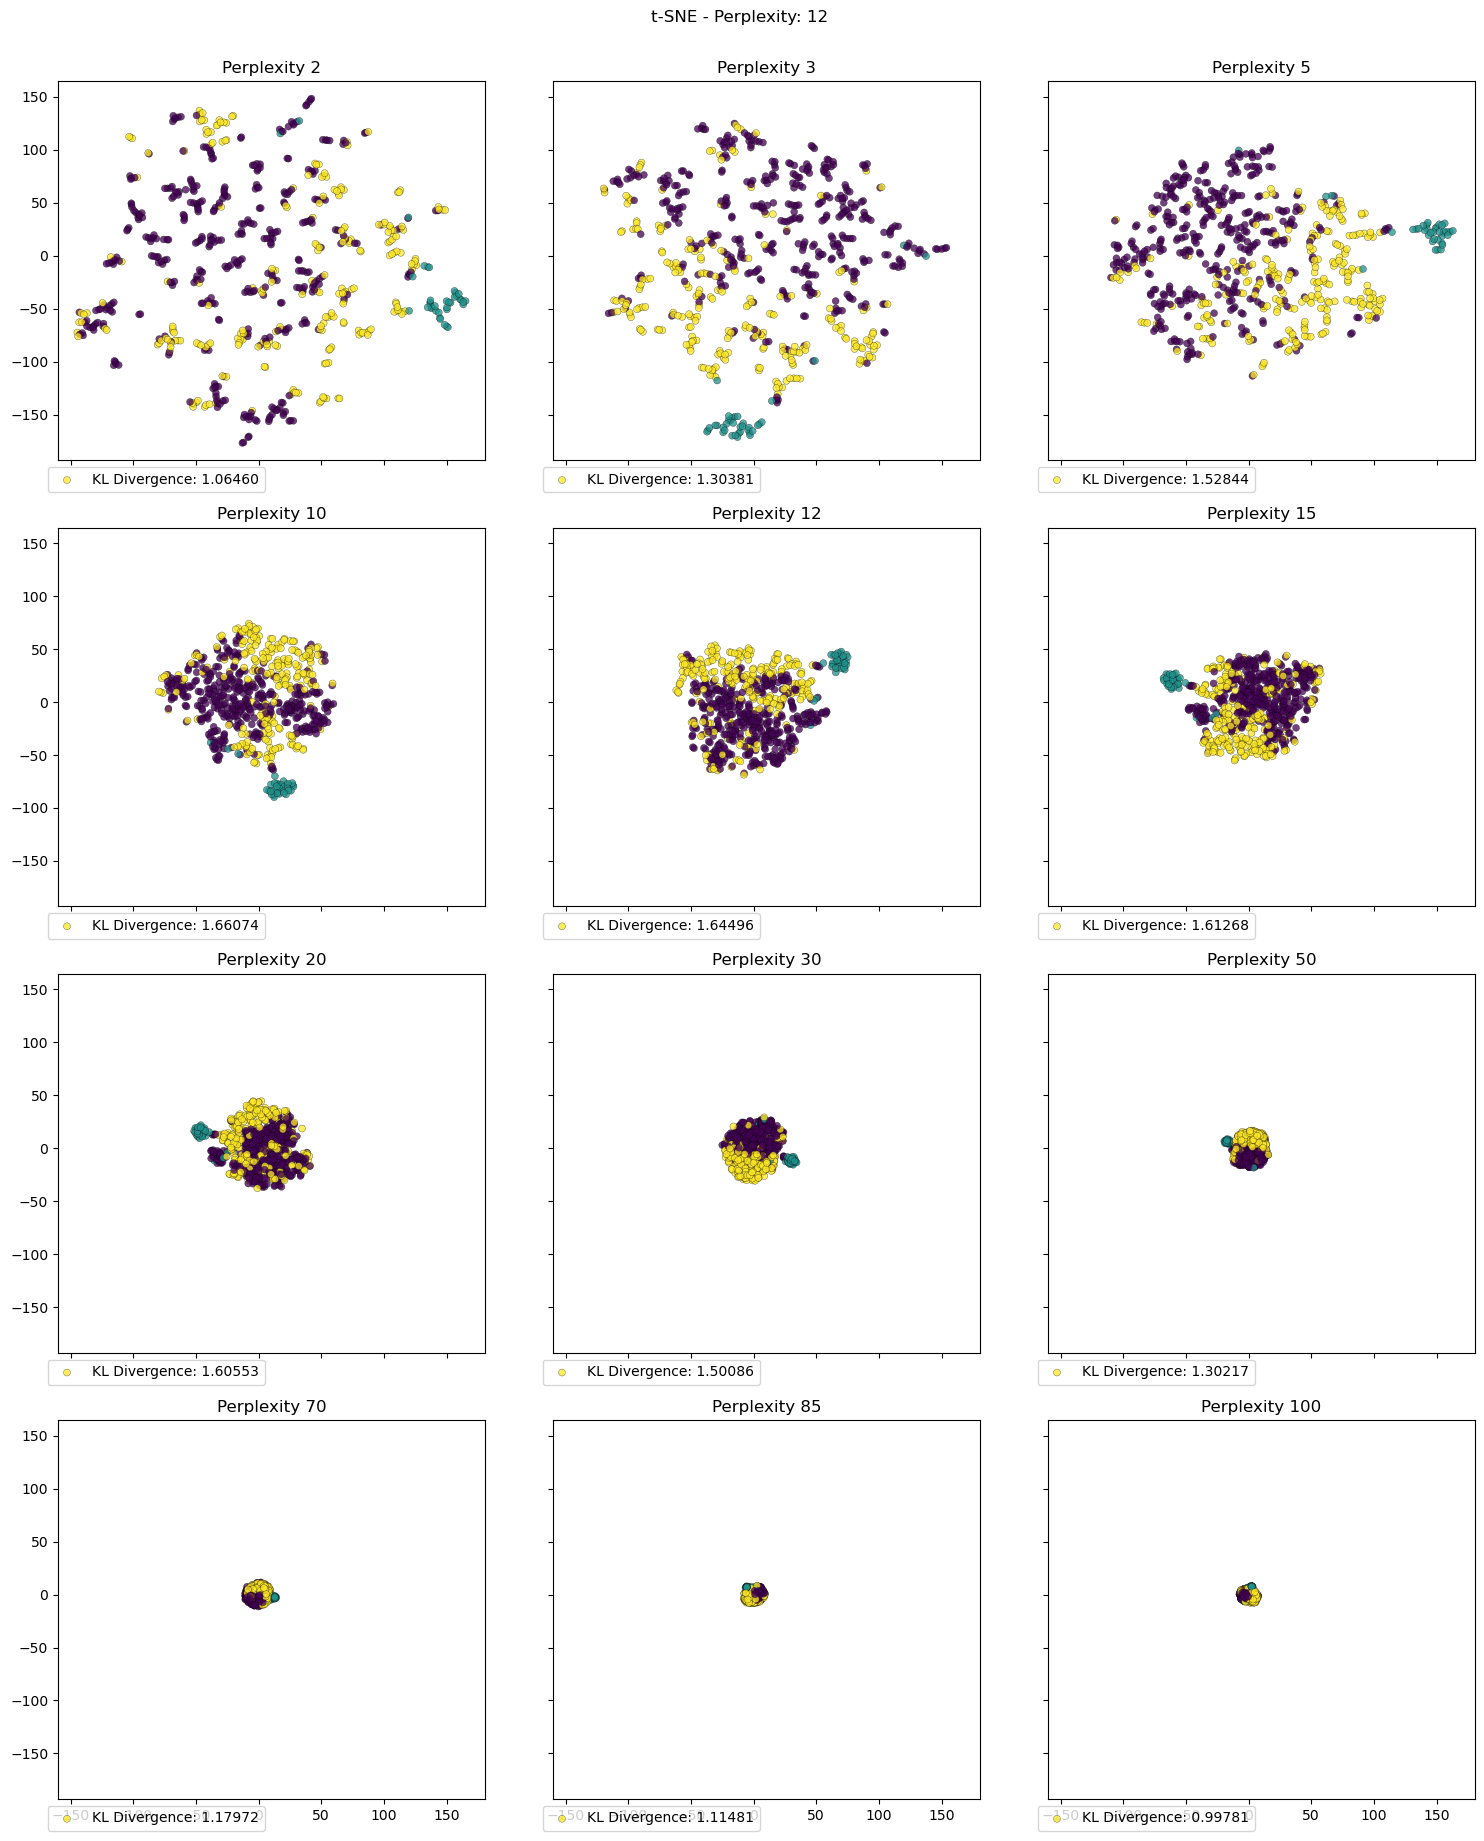

In [107]:
import matplotlib.pyplot as plt

perplexity_range = len(perplexity_values)
num_rows = (perplexity_range + 0) // 3

fig, axs = plt.subplots(
    nrows=num_rows, ncols=3,
    sharex=True, sharey=True, figsize=(15, 4.5*num_rows)
)

for i in range(perplexity_range):
    row_index = i // 3
    col_index = i % 3

    x = df_tsne.loc[:, (slice(None), 0)].iloc[:, i].array
    y = df_tsne.loc[:, (slice(None), 1)].iloc[:, i].array

    axs[row_index, col_index].scatter(x, y, c=labels, cmap='viridis', s=25, alpha=.75, edgecolors='black', linewidths=.25)
    #axs[row_index, col_index].plot(x, y, 'bo', markersize=5, alpha=.2, markeredgecolor='black', markeredgewidth=.5)
    legend_texts = ['KL Divergence: {:.5f}'.format(kl_dict[perplexity_values[i]])]
    axs[row_index, col_index].legend(legend_texts, loc='best', bbox_to_anchor=(0.5, 0), fontsize=10)
    axs[row_index, col_index].set_title('Perplexity {}'.format(perplexity_values[i]), fontsize=12)  # Adicionando subtítulo

fig.tight_layout()
plt.suptitle('t-SNE - Perplexity: {}'.format(perplexity_range), y=1.02)

arquivo = 'TSNE_PRELIMINAR_01_PERPLEXITY.png'
diretorio_img = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

plt.show()

## 3.2 kNN

In [44]:
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline

In [108]:
n_perplexity = 50
n_neighbors = int(3.0 * n_perplexity + 1) + 1

In [46]:
kNN_transformer = KNeighborsTransformer(n_neighbors=n_neighbors, mode='distance', metric='euclidean')
kNN_computado = kNN_transformer.fit_transform(embeddings)

In [109]:
tsne_knn_params = dict(
    n_components=2,
    learning_rate='auto', 
    n_iter=10000, 
    n_iter_without_progress=600,
    min_grad_norm=1e-07,
    metric='precomputed',
    metric_params=None,
    init='random', 
    verbose=1,
    random_state=None,
    method='barnes_hut',
    n_jobs=-1
)

In [48]:
make_pipeline(
    kNN_transformer,
    tsne_preliminar(perplexity=n_perplexity, **tsne_knn_params)
    )

TypeError: 'TSNE' object is not callable

In [ ]:
#transformer =  make_pipeline('TSNE with KNeighborsTransformer',KNeighborsTransformer,tsne_preliminar(perplexity=n_perplexity, metric="precomputed", **tsne_preliminar_params))

# = TSNE(early_exaggeration=12.0, angle=.5,

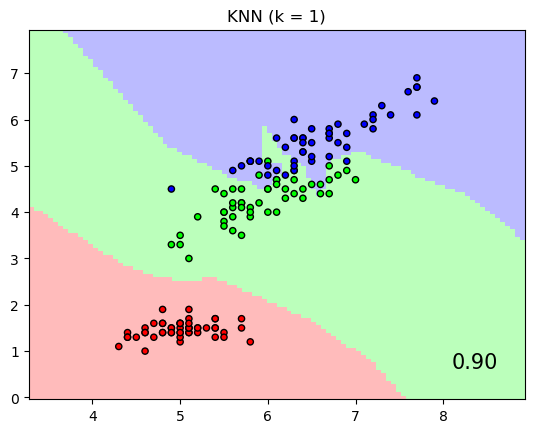

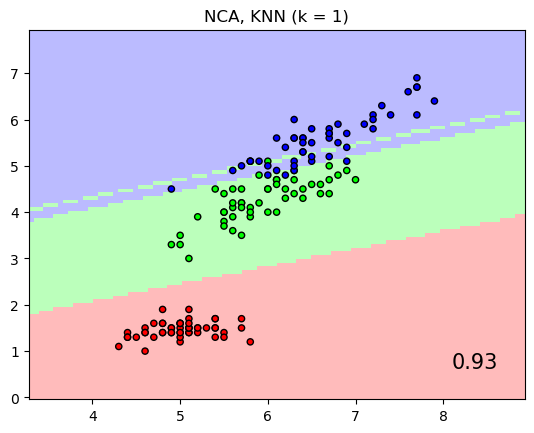

In [49]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()

#### Code

## X.X. Early Exaggeration

In [110]:
n_components=2
perplexity_value = 50
n_early_exaggeration=[1,5,10,12,15,25,50,100,150]

label_colunas_1 = []
label_colunas_2 = []

for early_exaggeration_value in n_early_exaggeration:
    for i in range(0,2):
        label_colunas_1.append(early_exaggeration_value)
        label_colunas_2.append(i)

df_tsne = pd.DataFrame(columns=[label_colunas_1,label_colunas_2], dtype='float64')
kl_dict = {}

In [111]:
start = time.time()

for early_exaggeration_value in tqdm(n_early_exaggeration):
    start2 = time.time()
    tsne_preliminar = TSNE(perplexity=perplexity_value, early_exaggeration=early_exaggeration_value, angle=.5,**tsne_preliminar_params)
    results = tsne_preliminar.fit_transform(embeddings)
    duration2 = time.time() - start2
    kl_dict[early_exaggeration_value] = tsne_preliminar.kl_divergence_
    print(f'>>>>> KL Divergence {early_exaggeration_value}: {tsne_preliminar.kl_divergence_} ({duration2:.3f} segs)')

    for i in range(0,2):
        df_tsne[early_exaggeration_value, i] = results[:,(i-1)]

duration = time.time() - start

print(f"Duração total {duration:.3f} segs")

diretorio = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
arquivo = 'DF_TSNE_02_EARLY_EXAGGERATION.parquet'
df_tsne.to_parquet(os.path.join(diretorio, arquivo), engine='pyarrow', compression='gzip')

  0%|          | 0/9 [00:00<?, ?it/s]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 1.330564


 11%|█         | 1/9 [00:02<00:22,  2.77s/it]

[t-SNE] KL divergence after 1900 iterations: 1.323208
>>>>> KL Divergence 1: 1.3232077360153198 (2.770 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 19.554008


 22%|██▏       | 2/9 [00:07<00:28,  4.06s/it]

[t-SNE] KL divergence after 3500 iterations: 1.345608
>>>>> KL Divergence 5: 1.3456079959869385 (4.963 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.001s...
[t-SNE] Computed neighbors for 669 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 100 iterations with early exaggeration: 46.230053


 33%|███▎      | 3/9 [00:09<00:19,  3.24s/it]

[t-SNE] KL divergence after 1500 iterations: 1.300342
>>>>> KL Divergence 10: 1.3003416061401367 (2.256 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.664631


 44%|████▍     | 4/9 [00:14<00:18,  3.73s/it]

[t-SNE] KL divergence after 3200 iterations: 1.313374
>>>>> KL Divergence 12: 1.3133735656738281 (4.480 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.450371


 56%|█████▌    | 5/9 [00:19<00:16,  4.02s/it]

[t-SNE] KL divergence after 3050 iterations: 1.295512
>>>>> KL Divergence 15: 1.2955121994018555 (4.527 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 140.637024


 67%|██████▋   | 6/9 [00:22<00:11,  3.75s/it]

[t-SNE] KL divergence after 2150 iterations: 1.324071
>>>>> KL Divergence 25: 1.3240710496902466 (3.221 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 358.306946


 78%|███████▊  | 7/9 [00:28<00:08,  4.42s/it]

[t-SNE] KL divergence after 3900 iterations: 1.366857
>>>>> KL Divergence 50: 1.3668568134307861 (5.790 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 810.766724


 89%|████████▉ | 8/9 [00:34<00:05,  5.19s/it]

[t-SNE] KL divergence after 4750 iterations: 1.406993
>>>>> KL Divergence 100: 1.4069926738739014 (6.830 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.001s...
[t-SNE] Computed neighbors for 669 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 1295.337402


100%|██████████| 9/9 [00:42<00:00,  4.70s/it]

[t-SNE] KL divergence after 4950 iterations: 1.397381
>>>>> KL Divergence 150: 1.3973809480667114 (7.427 segs)
Duração total 42.279 segs


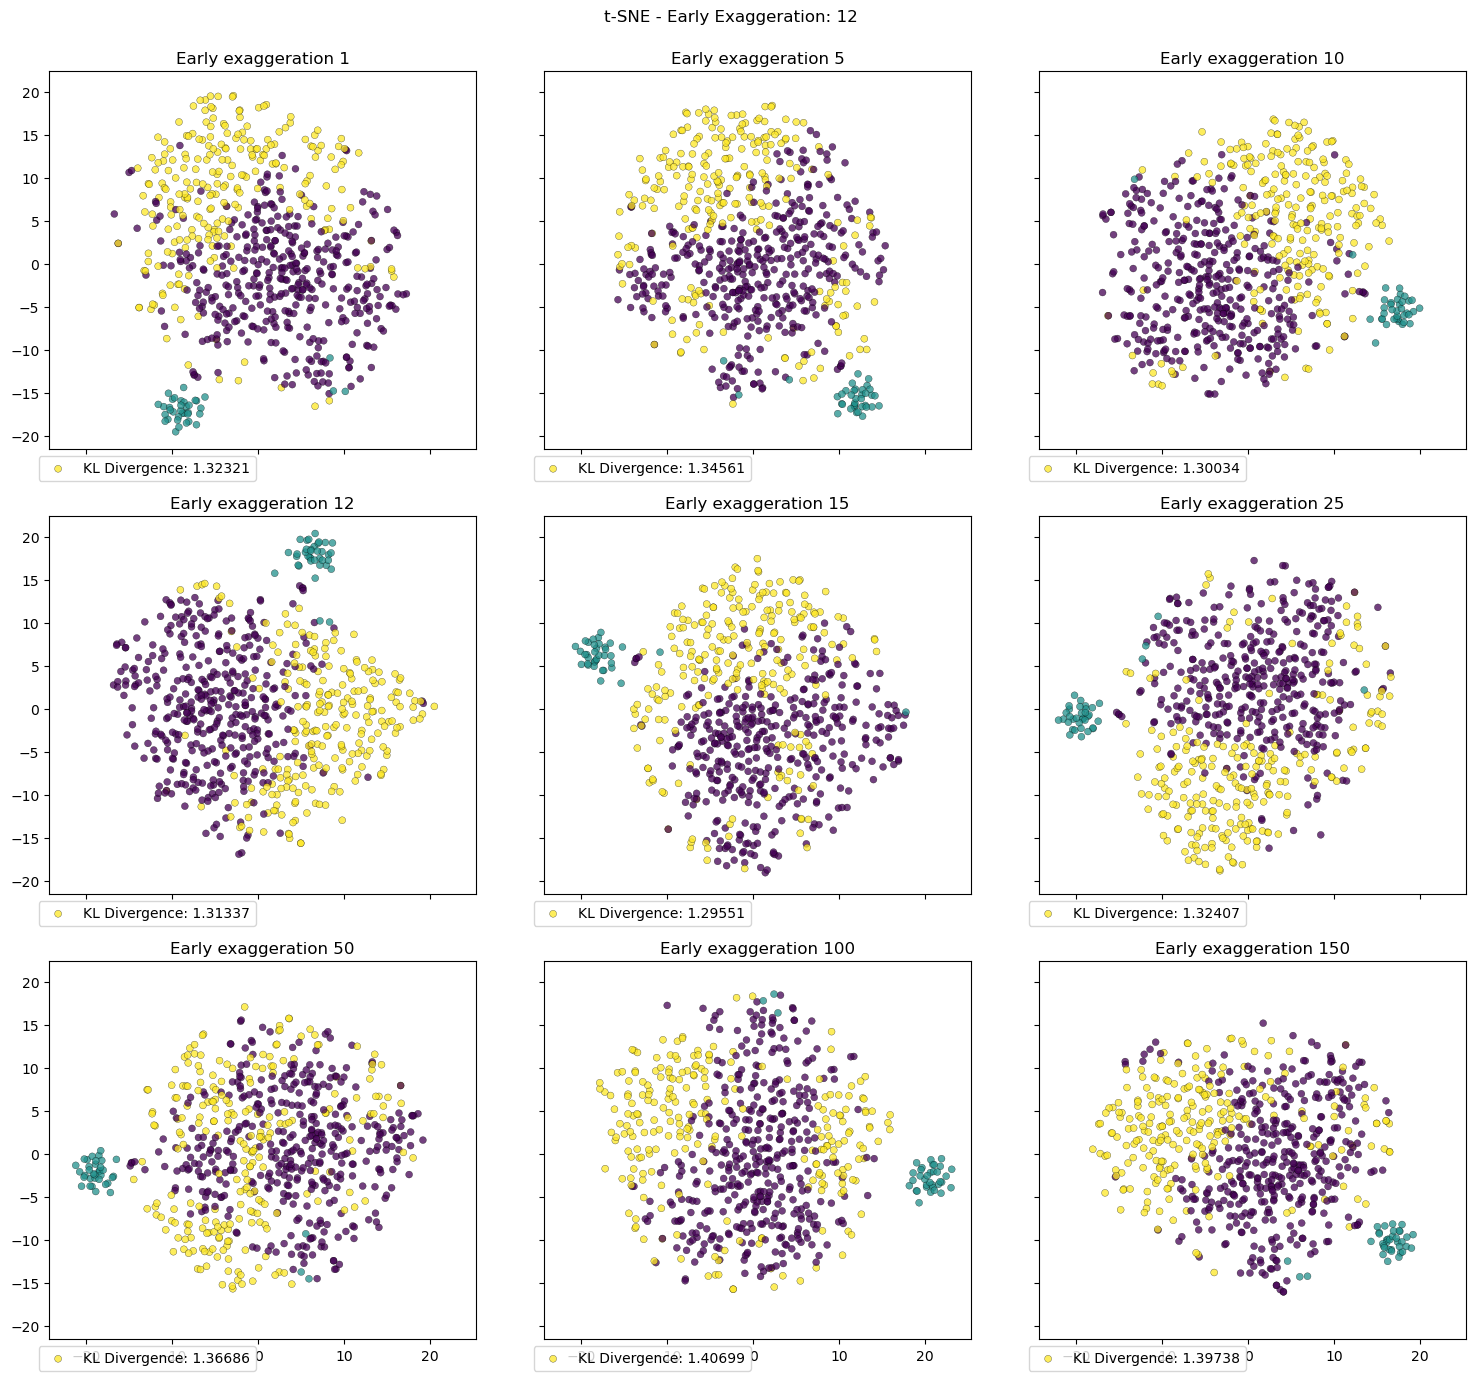

In [112]:
early_exaggeration_range = len(n_early_exaggeration)
num_rows = (early_exaggeration_range + 1) // 3

fig, axs = plt.subplots(
    nrows=num_rows, ncols=3,
    sharex=True, sharey=True, figsize=(15, 4.5*num_rows)
)

for i in range(early_exaggeration_range):
    row_index = i // 3
    col_index = i % 3

    x = df_tsne.loc[:, (slice(None), 0)].iloc[:, i].array
    y = df_tsne.loc[:, (slice(None), 1)].iloc[:, i].array

    axs[row_index, col_index].scatter(x, y, c=labels, cmap='viridis', s=25, alpha=.75, edgecolors='black', linewidths=.25)
    #axs[row_index, col_index].plot(x, y, 'bo', markersize=5, alpha=.2, markeredgecolor='black', markeredgewidth=.5)
    legend_texts = ['KL Divergence: {:.5f}'.format(kl_dict[n_early_exaggeration[i]])]
    axs[row_index, col_index].legend(legend_texts, loc='best', bbox_to_anchor=(0.5, 0), fontsize=10)
    axs[row_index, col_index].set_title('Early exaggeration {}'.format(n_early_exaggeration[i]), fontsize=12)  # Adicionando subtítulo

fig.tight_layout()
plt.suptitle('t-SNE - Early Exaggeration: {}'.format(perplexity_range), y=1.02)

arquivo = 'TSNE_PRELIMINAR_02_EARLY_EXAGGERATION.png'
diretorio_img = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

plt.show()

## X.X. Angle

In [113]:
angle_values = [.8,.4,.2,.1,.05,.01,.001,.0001,.00001]
early_exaggeration_value=15

label_colunas_1 = []
label_colunas_2 = []

for n_angle in angle_values:
    for i in range(0,2):
        label_colunas_1.append(n_angle)
        label_colunas_2.append(i)

df_tsne = pd.DataFrame(columns=[label_colunas_1,label_colunas_2], dtype='float64')
kl_dict = {}

start = time.time()

for n_angle in tqdm(angle_values):
    start2 = time.time()
    tsne_preliminar = TSNE(perplexity=perplexity_value, early_exaggeration=early_exaggeration_value, angle=n_angle, **tsne_preliminar_params)
    tsne_results = tsne_preliminar.fit_transform(embeddings)
    duration2 = time.time() - start2
    #print(f"Duração {duration2:.3f} segs")
    kl_dict[n_angle] = tsne_preliminar.kl_divergence_
    print(f'>>>>> KL Divergence {n_angle}: {tsne_preliminar.kl_divergence_} ({duration2:.3f} segs)')
    for i in range(0,n_components):
        df_tsne[n_angle, i] = tsne_results[:,(i-1)]

duration = time.time() - start

print(f"Duração total {duration:.3f} segs")

diretorio = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
arquivo = 'DF_TSNE_03_ANGLE.parquet'
df_tsne.to_parquet(os.path.join(diretorio, arquivo), engine='pyarrow', compression='gzip')

  0%|          | 0/9 [00:00<?, ?it/s]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.441177


 11%|█         | 1/9 [00:03<00:28,  3.60s/it]

[t-SNE] KL divergence after 2900 iterations: 1.313088
>>>>> KL Divergence 0.8: 1.313087821006775 (3.602 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.001s...
[t-SNE] Computed neighbors for 669 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.442078


 22%|██▏       | 2/9 [00:07<00:27,  3.92s/it]

[t-SNE] KL divergence after 2650 iterations: 1.306930
>>>>> KL Divergence 0.4: 1.3069301843643188 (4.146 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.431671


 33%|███▎      | 3/9 [00:12<00:25,  4.25s/it]

[t-SNE] KL divergence after 2100 iterations: 1.365341
>>>>> KL Divergence 0.2: 1.365341067314148 (4.638 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.433861


 44%|████▍     | 4/9 [00:19<00:27,  5.50s/it]

[t-SNE] KL divergence after 2600 iterations: 1.323986
>>>>> KL Divergence 0.1: 1.3239858150482178 (7.430 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.434273


 56%|█████▌    | 5/9 [00:33<00:34,  8.58s/it]

[t-SNE] KL divergence after 4350 iterations: 1.325719
>>>>> KL Divergence 0.05: 1.325718879699707 (14.021 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.433243


 67%|██████▋   | 6/9 [00:39<00:22,  7.57s/it]

[t-SNE] KL divergence after 1650 iterations: 1.312355
>>>>> KL Divergence 0.01: 1.3123548030853271 (5.613 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.432808


 78%|███████▊  | 7/9 [00:44<00:13,  6.78s/it]

[t-SNE] KL divergence after 1500 iterations: 1.348400
>>>>> KL Divergence 0.001: 1.3484001159667969 (5.154 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.432968


 89%|████████▉ | 8/9 [00:51<00:06,  6.86s/it]

[t-SNE] KL divergence after 2050 iterations: 1.348659
>>>>> KL Divergence 0.0001: 1.348658800125122 (7.032 segs)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 669 samples in 0.000s...
[t-SNE] Computed neighbors for 669 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.938011
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.444443


100%|██████████| 9/9 [00:55<00:00,  6.22s/it]

[t-SNE] KL divergence after 1250 iterations: 1.355682
>>>>> KL Divergence 1e-05: 1.355682134628296 (4.331 segs)
Duração total 55.968 segs


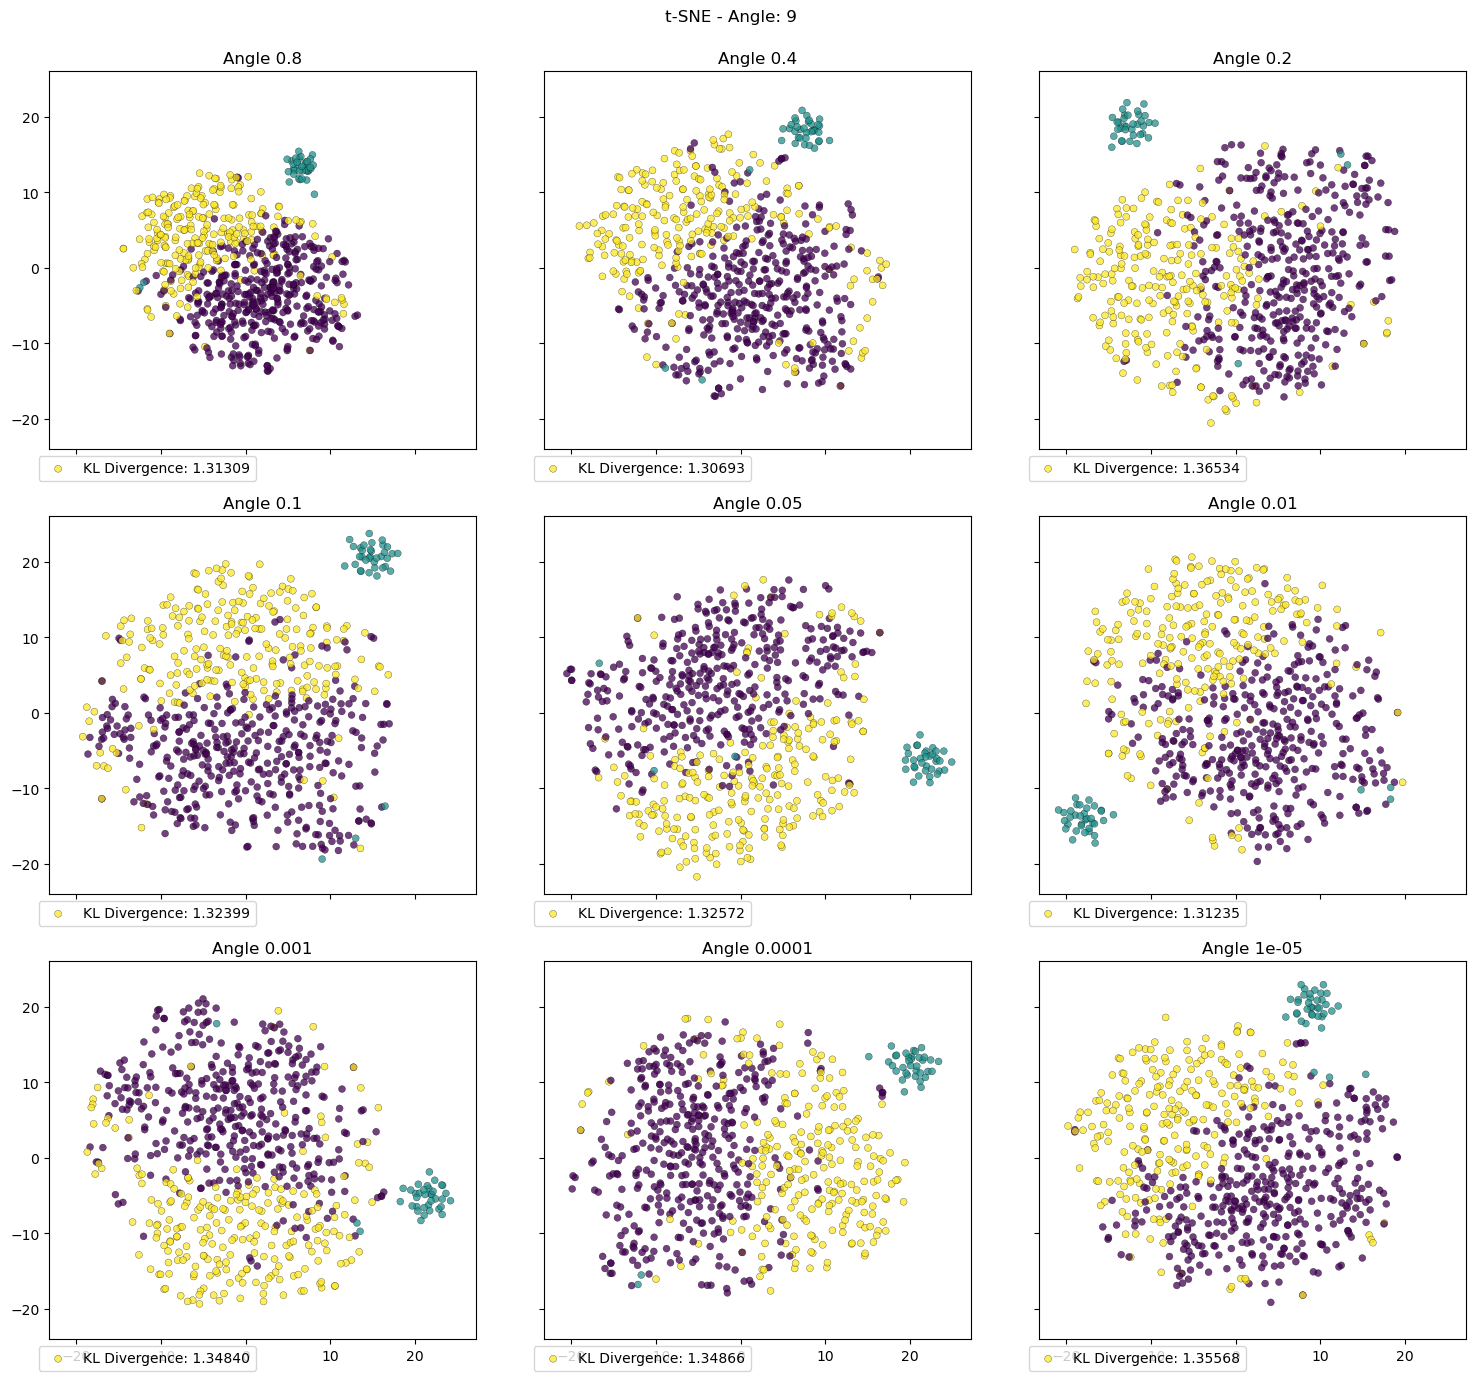

In [114]:
angle_values_range = len(angle_values)
num_rows = (angle_values_range + 1) // 3

fig, axs = plt.subplots(
    nrows=num_rows, ncols=3,
    sharex=True, sharey=True, figsize=(15, (4.5* num_rows))
)

for i in range(angle_values_range):
    row_index = i // 3
    col_index = i % 3

    x = df_tsne.loc[:, (slice(None), 0)].iloc[:, i].array
    y = df_tsne.loc[:, (slice(None), 1)].iloc[:, i].array

    axs[row_index, col_index].scatter(x, y, c=labels, cmap='viridis', s=25, alpha=.75, edgecolors='black', linewidths=.25)
    legend_texts = ['KL Divergence: {:.5f}'.format(kl_dict[angle_values[i]])]
    axs[row_index, col_index].legend(legend_texts, loc='best', bbox_to_anchor=(0.5, 0), fontsize=10)
    axs[row_index, col_index].set_title('Angle {}'.format(angle_values[i]), fontsize=12)  # Adicionando subtítulo

fig.tight_layout()
plt.suptitle('t-SNE - Angle: {}'.format(angle_values_range), y=1.02)

arquivo = 'TSNE_PRELIMINAR_03_ANGLE.png'
diretorio_img = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

plt.show()

## X.X. Final

In [115]:
tsne_final_params = dict(
    n_components=2,
    learning_rate='auto', 
    n_iter=6000, 
    n_iter_without_progress=100,
    min_grad_norm=1e-08,
    metric='euclidean', #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
    metric_params=None,
    init='pca', 
    verbose=2,
    random_state=None,
    method='exact',
    n_jobs=-1
)

In [116]:
import time

tsne_final = TSNE(perplexity=perplexity_value, early_exaggeration=early_exaggeration_value, angle=.01, **tsne_final_params)
start = time.time()
#tsne_results = tsne_final.fit_transform(embeddings)
resultados = tsne_final.fit_transform(embeddings)

duration = time.time() - start
print(f"Duração total {duration:.3f} segs")

diretorio = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
arquivo = 'DF_TSNE_FINAL.parquet'
df_tsne.to_parquet(os.path.join(diretorio, arquivo), engine='pyarrow', compression='gzip')

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 669 / 669
[t-SNE] Mean sigma: 0.906165
[t-SNE] Iteration 50: error = 75.6457945, gradient norm = 0.0053939 (50 iterations in 2.295s)
[t-SNE] Iteration 100: error = 75.6486237, gradient norm = 0.0129466 (50 iterations in 2.357s)
[t-SNE] Iteration 150: error = 75.6547532, gradient norm = 0.0210888 (50 iterations in 2.332s)
[t-SNE] Iteration 200: error = 75.6467000, gradient norm = 0.0092461 (50 iterations in 2.334s)
[t-SNE] Iteration 250: error = 75.6550597, gradient norm = 0.0209239 (50 iterations in 2.399s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.655060
[t-SNE] Iteration 300: error = 1.3638071, gradient norm = 0.0084251 (50 iterations in 2.402s)
[t-SNE] Iteration 350: error = 1.2939262, gradient norm = 0.0059111 (50 iterations in 2.362s)
[t-SNE] Iteration 400: error = 1.2698949, gradient norm = 0.0046395 (50 iterations in 2.315s)
[t-SNE] Iteration 450: error = 1.

In [117]:
print(f"Duração {duration:.3f} segs")
print(f'KL Divergence Final: {tsne_final.kl_divergence_}')
tsne_escolhido = pd.DataFrame(resultados)

Duração 285.906 segs
KL Divergence Final: 1.2495118343471883


In [118]:
resultados[:,1]

array([-1.09447794e+01,  4.04668379e+00, -1.92175877e+00, -3.43531799e+00,
        2.47148466e+00, -1.56667213e+01, -1.64461155e+01, -3.99124169e+00,
       -7.97059965e+00,  4.02405310e+00,  1.95163631e+01,  1.02501297e+01,
       -6.03440094e+00,  8.90214157e+00, -9.97821426e+00,  5.58975458e+00,
        5.53611231e+00,  1.18110456e+01, -1.29446774e+01, -9.05057240e+00,
       -1.12720060e+01, -8.63706470e-01, -1.96210814e+00,  4.01829720e+00,
        1.48435717e+01, -1.81157589e+01,  1.93631840e+01,  1.66640034e+01,
       -3.28585958e+00,  1.49574957e+01, -1.03077984e+01, -9.14476395e+00,
       -1.83647709e+01,  3.25692177e+00, -7.71959209e+00,  2.18068180e+01,
       -1.74263077e+01,  1.60319328e+01, -6.65792131e+00, -1.32362213e+01,
       -2.05162067e+01,  3.06803763e-01, -5.66715860e+00,  2.66716814e+00,
       -1.24672308e+01, -1.83998451e+01, -5.29932308e+00, -5.58227873e+00,
       -5.92835903e+00, -1.20302753e+01, -1.94365788e+01, -1.28134041e+01,
       -7.77007151e+00,  

<function matplotlib.pyplot.show(close=None, block=None)>

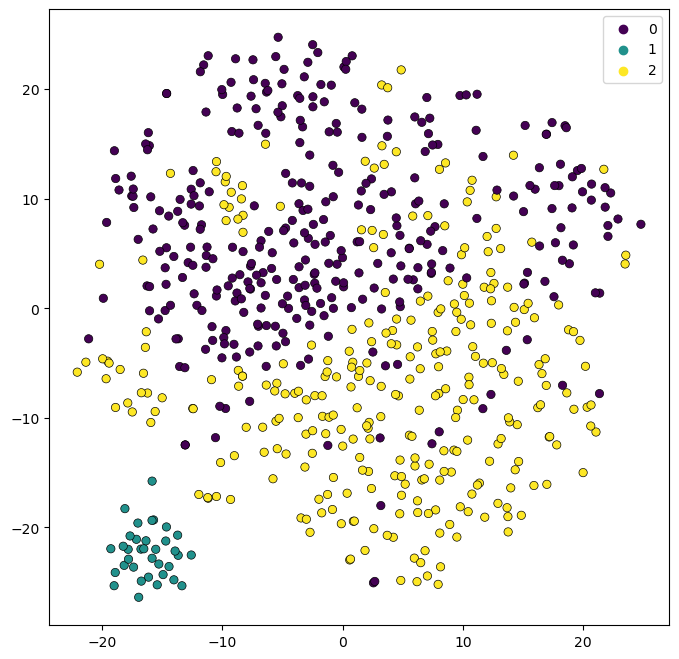

In [130]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    data=resultados,
    x=resultados[:,0],
    y=resultados[:,1],
    hue=labels,
    palette="viridis",
    edgecolor='black',
    #c=labels,
    #style=labels,
    #cmap="viridis",
    legend="full",
    alpha=1,
    #hue_norm=(0, 3)
)
arquivo = 'TSNE_FINAL.png'
diretorio_img = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS\\CLUSTERIZACAO'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

plt.show

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


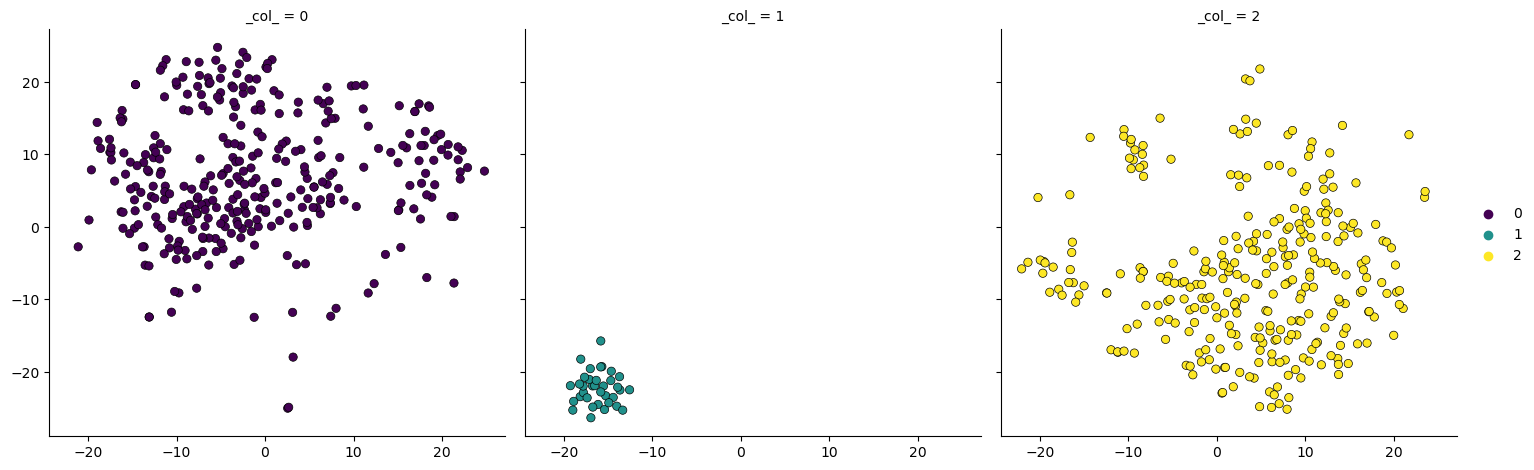

In [131]:
sns.relplot(
    data=resultados,
    x=resultados[:,0],
    y=resultados[:,1],
    col=labels, hue=labels,
    kind="scatter",
    palette="viridis",
    edgecolor='black',
)
arquivo = 'TSNE_FINAL_RELPLOT.png'
diretorio_img = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS\\CLUSTERIZACAO'
plt.savefig(os.path.join(diretorio_img, arquivo), bbox_inches='tight')

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples': [1, 2, 3, 5, 10],
              'min_cluster_size': [1, 2, 3, 4, 5, 7],
              'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(
    estimator=dbscan,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    )

grid_search.fit(embeddings)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
labels = grid_search.best_estimator_.fit_predict(embeddings)

print("Rótulos de cluster:")
print(labels)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator DBSCAN(leaf_size=50) does not.

# Dataset e Labels

In [132]:
#diretorio = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
arquivo = 'DF_CAU_02.parquet'
df_post = pd.read_parquet(os.path.join(diretorio_df, arquivo), engine='pyarrow')

In [122]:
df_post['labels'] = labels

In [123]:
arquivo = 'DF_CAU_04.parquet'
df_post.to_parquet(os.path.join(diretorio_df, arquivo), compression='gzip', engine='pyarrow')

# 4. Feature Extraction

- https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction

Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features

Inertia is not a normalized metric. The lower values of inertia are better and zero is optimal, but in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.